In [1]:
# Import Packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

In [2]:
# Read in main CSV
digitalCurrency_df = pd.read_csv("data/Digital_Currency.csv")
digitalCurrency_df.head()

Unnamed: 0       open_SAR  open_USD       high_SAR  high_USD  \
0  2021-01-30  128437.248512  34246.28  131012.723200  34933.00   
1  2021-01-29  125144.022272  33368.18  144510.037760  38531.90   
2  2021-01-28  113870.357376  30362.19  126703.438592  33783.98   
3  2021-01-27  121753.023104  32464.01  122102.860416  32557.29   
4  2021-01-26  120966.114176  32254.19  123470.218752  32921.88   

         low_SAR   low_USD      close_SAR  close_USD  volume  
0  123106.880000  32825.00  128333.212416   34218.54   43072  
1  119695.516160  31915.40  128459.450880   34252.20  231827  
2  111919.811840  29842.10  125131.570944   33364.86   92621  
3  109668.146688  29241.72  113885.208960   30366.15   95911  
4  115652.472448  30837.37  121767.124608   32467.77   84972

In [3]:
# Explore data characteristics
digitalCurrency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   object 
 1   open_SAR    1000 non-null   float64
 2   open_USD    1000 non-null   float64
 3   high_SAR    1000 non-null   float64
 4   high_USD    1000 non-null   float64
 5   low_SAR     1000 non-null   float64
 6   low_USD     1000 non-null   float64
 7   close_SAR   1000 non-null   float64
 8   close_USD   1000 non-null   float64
 9   volume      1000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


In [4]:
# Explore missing values
digitalCurrency_df.isnull().sum()

Unnamed: 0    0
open_SAR      0
open_USD      0
high_SAR      0
high_USD      0
low_SAR       0
low_USD       0
close_SAR     0
close_USD     0
volume        0
dtype: int64

In [5]:
# Explore descriptive statistics 
digitalCurrency_df.describe()

open_SAR      open_USD       high_SAR      high_USD  \
count    1000.000000   1000.000000    1000.000000   1000.000000   
mean    34825.322255   9285.762120   35789.618165   9542.880270   
std     21728.028028   5793.522832   22785.946842   6075.604427   
min     12045.197184   3211.710000   12288.185600   3276.500000   
25%     24254.558752   6467.192500   24686.089152   6582.255000   
50%     30714.632128   8189.695000   31321.953152   8351.630000   
75%     38317.311744  10216.860000   39077.527200  10419.562500   
max    152217.334784  40586.960000  157329.280000  41950.000000   

             low_SAR       low_USD      close_SAR     close_USD         volume  
count    1000.000000   1000.000000    1000.000000   1000.000000    1000.000000  
mean    33796.329057   9011.393200   34917.483572   9310.335850   53100.498000  
std     20565.410145   5483.524463   21928.280072   5846.917681   35329.832031  
min     11837.237504   3156.260000   12045.234688   3211.720000    5743.000000  
25%     23721.336256   6325.015000   24252.946080   6466.762500   30045.750000  
50%     30010.869568   8002.045000   30713.263232   8189.330000   43795.500000  
75%     37158.878816   9907.977500   38329.725568  10220.170000   64909.250000  
max    145215.488000  38720.000000  152201.770624  40582.810000  402201.000000

In [6]:
# Rename the column with no name to 'Date'
digitalCurrency_df = digitalCurrency_df.rename(columns={digitalCurrency_df.columns[0]: 'Date'})
digitalCurrency_df.head()

Date       open_SAR  open_USD       high_SAR  high_USD  \
0  2021-01-30  128437.248512  34246.28  131012.723200  34933.00   
1  2021-01-29  125144.022272  33368.18  144510.037760  38531.90   
2  2021-01-28  113870.357376  30362.19  126703.438592  33783.98   
3  2021-01-27  121753.023104  32464.01  122102.860416  32557.29   
4  2021-01-26  120966.114176  32254.19  123470.218752  32921.88   

         low_SAR   low_USD      close_SAR  close_USD  volume  
0  123106.880000  32825.00  128333.212416   34218.54   43072  
1  119695.516160  31915.40  128459.450880   34252.20  231827  
2  111919.811840  29842.10  125131.570944   33364.86   92621  
3  109668.146688  29241.72  113885.208960   30366.15   95911  
4  115652.472448  30837.37  121767.124608   32467.77   84972

In [7]:
# Convert 'Date' column from object to datetime format
digitalCurrency_df['Date'] = pd.to_datetime(digitalCurrency_df['Date'])
digitalCurrency_df.head()

Date       open_SAR  open_USD       high_SAR  high_USD        low_SAR  \
0 2021-01-30  128437.248512  34246.28  131012.723200  34933.00  123106.880000   
1 2021-01-29  125144.022272  33368.18  144510.037760  38531.90  119695.516160   
2 2021-01-28  113870.357376  30362.19  126703.438592  33783.98  111919.811840   
3 2021-01-27  121753.023104  32464.01  122102.860416  32557.29  109668.146688   
4 2021-01-26  120966.114176  32254.19  123470.218752  32921.88  115652.472448   

    low_USD      close_SAR  close_USD  volume  
0  32825.00  128333.212416   34218.54   43072  
1  31915.40  128459.450880   34252.20  231827  
2  29842.10  125131.570944   33364.86   92621  
3  29241.72  113885.208960   30366.15   95911  
4  30837.37  121767.124608   32467.77   84972

## Merge all data frames into single data frame

In [8]:
# Folder path
folder_path = "C:/Users/gseba/OneDrive/School_Stuff/ADS_506_Applied_Time_Series_Analysis/Group_Project/Working_Files_Git/Bitcoin_time_series_analysis_and_forecast/data"  

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Create a dictionary to store DataFrames
dataframes = {}

# Read each CSV file into a DataFrame and store it in the dictionary
for csv_file in csv_files:
    file_name = os.path.basename(csv_file)  # Extract the file name from the path
    short_name = os.path.splitext(file_name)[0]  # Remove the file extension
    df = pd.read_csv(os.path.join(folder_path, csv_file))
    dataframes[short_name] = df

# Rename and create new DataFrames with shorter names
inflation_df = dataframes['5-Year Breakeven Inflation Rate - 2018-2021']
brent_oil_df = dataframes['Crude Oil Prices Brent - Europe - 2018-2021']
wti_oil_df = dataframes['Crude Oil WTI Futures Historical Data - 2018-2021']
federal_funds_df = dataframes['Daily Federal Funds Rate from 2018-2021']
treasury_rates_df = dataframes['daily-treasury-rates - 2018-2021']
crypto_df = dataframes['Digital_Currency']
djia_df = dataframes['Dow Jones Industrial Average-DJIA - 2018-2021']
uncertainty_df = dataframes['Economic Policy Uncertainty Index for United States - 2018-2021']

In [9]:
# Run .info() for each data frame
for name, df in dataframes.items():
    print(f"DataFrame Name: {name}\n")
    print(df.info())  
    print("\n-------------------------\n")  


DataFrame Name: 5-Year Breakeven Inflation Rate - 2018-2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    715 non-null    object
 1   T5YIE   715 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB
None

-------------------------

DataFrame Name: Crude Oil Prices Brent - Europe - 2018-2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATE          714 non-null    object
 1   DCOILBRENTEU  714 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB
None

-------------------------

DataFrame Name: Crude Oil WTI Futures Historical Data - 2018-2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  


In [10]:
# Convert date columns to datetime format for each DataFrame
inflation_df['DATE'] = pd.to_datetime(inflation_df['DATE'])
brent_oil_df['DATE'] = pd.to_datetime(brent_oil_df['DATE'])
wti_oil_df['Date'] = pd.to_datetime(wti_oil_df['Date'])
federal_funds_df['DATE'] = pd.to_datetime(federal_funds_df['DATE'])
treasury_rates_df['Date'] = pd.to_datetime(treasury_rates_df['Date'])
crypto_df['Unnamed: 0'] = pd.to_datetime(crypto_df['Unnamed: 0'])
djia_df['DATE'] = pd.to_datetime(djia_df['DATE'])
uncertainty_df['DATE'] = pd.to_datetime(uncertainty_df['DATE'])

# Rename all date columns to "Date" in all DataFrames
inflation_df.rename(columns={'DATE': 'Date'}, inplace=True)
brent_oil_df.rename(columns={'DATE': 'Date'}, inplace=True)
wti_oil_df.rename(columns={'Date': 'Date'}, inplace=True)
federal_funds_df.rename(columns={'DATE': 'Date'}, inplace=True)
treasury_rates_df.rename(columns={'Date': 'Date'}, inplace=True)
crypto_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
djia_df.rename(columns={'DATE': 'Date'}, inplace=True)
uncertainty_df.rename(columns={'DATE': 'Date'}, inplace=True)

# Merge all DataFrames on the 'Date' column
merged_df = pd.merge(inflation_df, brent_oil_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, wti_oil_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, federal_funds_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, treasury_rates_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, crypto_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, djia_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, uncertainty_df, on='Date', how='outer')

In [11]:
# Explore the merged data frame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1318 non-null   datetime64[ns]
 1   T5YIE                       715 non-null    object        
 2   DCOILBRENTEU                714 non-null    object        
 3   Price                       722 non-null    float64       
 4   Open                        722 non-null    float64       
 5   High                        722 non-null    float64       
 6   Low                         722 non-null    float64       
 7   Vol.                        690 non-null    object        
 8   Change %                    722 non-null    object        
 9   DFF                         1000 non-null   float64       
 10  4 WEEKS BANK DISCOUNT       1001 non-null   float64       
 11  4 WEEKS COUPON EQUIVALENT   1001 non-null   float64     

In [30]:
merged_df.head(10)

Date T5YIE DCOILBRENTEU  Price   Open   High    Low     Vol. Change %  \
0 2018-05-08   2.1        74.16  69.06  70.03  70.40  67.63    1.25M   -2.36%   
1 2018-05-09  2.13         77.6  71.14  70.05  71.36  69.85  863.39K    3.01%   
2 2018-05-10  2.12        77.59  71.36  71.23  71.89  70.56  749.81K    0.31%   
3 2018-05-11  2.13        77.37  70.70  71.45  71.63  70.45  634.15K   -0.92%   
4 2018-05-14  2.12        78.17  70.96  70.54  71.26  70.26  592.83K    0.37%   
5 2018-05-15  2.15        78.94  71.31  71.15  71.92  70.42  815.29K    0.49%   
6 2018-05-16  2.16        78.19  71.49  71.02  71.59  70.66  574.28K    0.25%   
7 2018-05-17  2.16        80.09  71.49  71.56  72.30  71.09  562.64K    0.00%   
8 2018-05-18  2.14        78.38  71.28  71.60  71.75  70.99  211.79K   -0.29%   
9 2018-05-21  2.15        78.34  72.24  71.47  72.59  71.25  119.89K    1.35%   

   DFF  ...      high_SAR  high_USD       low_SAR  low_USD     close_SAR  \
0  1.7  ...  35537.665280   9475.70  33980.649216  9060.54  34457.025024   
1  1.7  ...  35216.256000   9390.00  33622.336000  8965.00  34916.224000   
2  1.7  ...  35235.458048   9395.12  33641.088000  8970.00  33761.850880   
3  1.7  ...  33816.606720   9016.80  31282.086400  8341.00  31503.360000   
4  1.7  ...  33303.514496   8879.99  31042.060800  8277.00  32490.990336   
5  1.7  ...  33228.506496   8859.99  31508.235520  8401.30  31735.884800   
6  1.7  ...  31833.395200   8488.00  30314.520704  8083.01  31240.832000   
7  1.7  ...  31743.385600   8464.00  29924.441600  7979.00  30158.691584   
8  1.7  ...  31027.846784   8273.21  29672.789760  7911.90  30902.583424   
9  1.7  ...  32235.850624   8595.31  31147.072000  8305.00  31433.002496   

   close_USD   volume      DJIA  USEPUINDXD  Day_of_Week  
0    9187.56  25533.0  24360.21      100.02      Tuesday  
1    9310.00  25673.0  24542.54       62.20    Wednesday  
2    9002.20  25055.0  24739.53       74.02     Thursday  
3    8400.00  48227.0  24831.17       78.27       Friday  
4    8663.34  37389.0  24899.41      127.21       Monday  
5    8462.00  28126.0  24706.41       42.73      Tuesday  
6    8330.00  31130.0  24768.93       50.06    Wednesday  
7    8041.46  25439.0  24713.98       74.49     Thursday  
8    8239.81  23476.0  24715.09      129.32       Friday  
9    8381.24  21516.0  25013.29       87.84       Monday  

[10 rows x 32 columns]

## Align the data frame by date to ensure all data is within the same range

In [12]:
# Store all DataFrames in a dictionary
all_dfs = {
    'Inflation': inflation_df,
    'Brent Oil': brent_oil_df,
    'WTI Oil': wti_oil_df,
    'Federal Funds': federal_funds_df,
    'Treasury Rates': treasury_rates_df,
    'Crypto': crypto_df,
    'DJIA': djia_df,
    'Uncertainty': uncertainty_df,
    'Digital Currency': digitalCurrency_df  # Include Digital Currency DataFrame
}

# Find first and last dates in each DataFrame
for df_name, df in all_dfs.items():
    min_date = df['Date'].min()
    max_date = df['Date'].max()
    print(f"For {df_name} DataFrame:")
    print(f"First date: {min_date}")
    print(f"Last date: {max_date}")
    print()


For Inflation DataFrame:
First date: 2018-05-07 00:00:00
Last date: 2021-01-29 00:00:00

For Brent Oil DataFrame:
First date: 2018-05-08 00:00:00
Last date: 2021-01-29 00:00:00

For WTI Oil DataFrame:
First date: 2018-05-07 00:00:00
Last date: 2021-01-29 00:00:00

For Federal Funds DataFrame:
First date: 2018-05-07 00:00:00
Last date: 2021-01-30 00:00:00

For Treasury Rates DataFrame:
First date: 2018-01-02 00:00:00
Last date: 2021-12-31 00:00:00

For Crypto DataFrame:
First date: 2018-05-07 00:00:00
Last date: 2021-01-30 00:00:00

For DJIA DataFrame:
First date: 2018-05-07 00:00:00
Last date: 2021-01-29 00:00:00

For Uncertainty DataFrame:
First date: 2018-05-07 00:00:00
Last date: 2021-01-30 00:00:00

For Digital Currency DataFrame:
First date: 2018-05-07 00:00:00
Last date: 2021-01-30 00:00:00



### Remove rows with dates outside specified range

In [13]:
# Set the date range
start_date = '2018-05-08'
end_date = '2021-01-29'

# Convert dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the DataFrame based on the date range
merged_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

# Reset the index if needed
merged_df.reset_index(drop=True, inplace=True)

# Check the information of the filtered DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        998 non-null    datetime64[ns]
 1   T5YIE                       714 non-null    object        
 2   DCOILBRENTEU                714 non-null    object        
 3   Price                       721 non-null    float64       
 4   Open                        721 non-null    float64       
 5   High                        721 non-null    float64       
 6   Low                         721 non-null    float64       
 7   Vol.                        689 non-null    object        
 8   Change %                    721 non-null    object        
 9   DFF                         998 non-null    float64       
 10  4 WEEKS BANK DISCOUNT       682 non-null    float64       
 11  4 WEEKS COUPON EQUIVALENT   682 non-null    float64       

## Impute missing data with data from "weekend" due to market closures

In [14]:
# List to store the unique days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Function to count unique days of the week in a DataFrame
def count_unique_days(df):
    # Extract day of the week from the 'Date' column
    df['Day_of_Week'] = df['Date'].dt.day_name()
    
    # Count occurrences of each day
    unique_days_count = df['Day_of_Week'].value_counts().reindex(days_of_week, fill_value=0)
    
    return unique_days_count

# Store all DataFrames in a dictionary
all_dfs = {
    'Inflation': inflation_df,
    'Brent Oil': brent_oil_df,
    'WTI Oil': wti_oil_df,
    'Federal Funds': federal_funds_df,
    'Treasury Rates': treasury_rates_df,
    'Crypto': crypto_df,
    'DJIA': djia_df,
    'Uncertainty': uncertainty_df,
    'Digital Currency': digitalCurrency_df  # Include Digital Currency DataFrame
}

# Count unique days of the week in each DataFrame
for df_name, df in all_dfs.items():
    unique_days = count_unique_days(df)
    print(f"Unique days of the week in {df_name} DataFrame:")
    print(unique_days)
    print()


Unique days of the week in Inflation DataFrame:
Day_of_Week
Monday       143
Tuesday      143
Wednesday    143
Thursday     143
Friday       143
Saturday       0
Sunday         0
Name: count, dtype: int64

Unique days of the week in Brent Oil DataFrame:
Day_of_Week
Monday       142
Tuesday      143
Wednesday    143
Thursday     143
Friday       143
Saturday       0
Sunday         0
Name: count, dtype: int64

Unique days of the week in WTI Oil DataFrame:
Day_of_Week
Monday       143
Tuesday      143
Wednesday    143
Thursday     143
Friday       139
Saturday       0
Sunday        11
Name: count, dtype: int64

Unique days of the week in Federal Funds DataFrame:
Day_of_Week
Monday       143
Tuesday      143
Wednesday    143
Thursday     143
Friday       143
Saturday     143
Sunday       142
Name: count, dtype: int64

Unique days of the week in Treasury Rates DataFrame:
Day_of_Week
Monday       185
Tuesday      207
Wednesday    204
Thursday     203
Friday       202
Saturday       0
Sunday 

In [15]:
# List to store the unique days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Function to count unique days of the week in a DataFrame
def count_unique_days(df):
    # Extract day of the week from the 'Date' column
    df['Day_of_Week'] = df['Date'].dt.day_name()
    
    # Count occurrences of each day
    unique_days_count = df['Day_of_Week'].value_counts().reindex(days_of_week, fill_value=0)
    
    return unique_days_count

# Count unique days of the week in merged_df DataFrame
unique_days_merged = count_unique_days(merged_df)
print("Unique days of the week in merged_df DataFrame:")
print(unique_days_merged)


Unique days of the week in merged_df DataFrame:
Day_of_Week
Monday       142
Tuesday      143
Wednesday    143
Thursday     143
Friday       143
Saturday     142
Sunday       142
Name: count, dtype: int64


In [16]:
merged_df.isna().sum()

Date                            0
T5YIE                         284
DCOILBRENTEU                  284
Price                         277
Open                          277
High                          277
Low                           277
Vol.                          309
Change %                      277
DFF                             0
4 WEEKS BANK DISCOUNT         316
4 WEEKS COUPON EQUIVALENT     316
8 WEEKS BANK DISCOUNT         427
8 WEEKS COUPON EQUIVALENT     427
13 WEEKS BANK DISCOUNT        316
13 WEEKS COUPON EQUIVALENT    316
26 WEEKS BANK DISCOUNT        316
26 WEEKS COUPON EQUIVALENT    316
52 WEEKS BANK DISCOUNT        316
52 WEEKS COUPON EQUIVALENT    316
open_SAR                        0
open_USD                        0
high_SAR                        0
high_USD                        0
low_SAR                         0
low_USD                         0
close_SAR                       0
close_USD                       0
volume                          0
DJIA          

In [17]:
# Fill empty cells with data from the previous cell
merged_df = merged_df.fillna(method='ffill')

In [18]:
# List to store the unique days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Function to count unique days of the week in a DataFrame
def count_unique_days(df):
    # Extract day of the week from the 'Date' column
    df['Day_of_Week'] = df['Date'].dt.day_name()
    
    # Count occurrences of each day
    unique_days_count = df['Day_of_Week'].value_counts().reindex(days_of_week, fill_value=0)
    
    return unique_days_count

# Count unique days of the week in merged_df DataFrame
unique_days_merged = count_unique_days(merged_df)
print("Unique days of the week in merged_df DataFrame:")
print(unique_days_merged)

Unique days of the week in merged_df DataFrame:
Day_of_Week
Monday       142
Tuesday      143
Wednesday    143
Thursday     143
Friday       143
Saturday     142
Sunday       142
Name: count, dtype: int64


In [19]:
merged_df.isna().sum()

Date                            0
T5YIE                           0
DCOILBRENTEU                    0
Price                           0
Open                            0
High                            0
Low                             0
Vol.                            0
Change %                        0
DFF                             0
4 WEEKS BANK DISCOUNT           0
4 WEEKS COUPON EQUIVALENT       0
8 WEEKS BANK DISCOUNT         115
8 WEEKS COUPON EQUIVALENT     115
13 WEEKS BANK DISCOUNT          0
13 WEEKS COUPON EQUIVALENT      0
26 WEEKS BANK DISCOUNT          0
26 WEEKS COUPON EQUIVALENT      0
52 WEEKS BANK DISCOUNT          0
52 WEEKS COUPON EQUIVALENT      0
open_SAR                        0
open_USD                        0
high_SAR                        0
high_USD                        0
low_SAR                         0
low_USD                         0
close_SAR                       0
close_USD                       0
volume                          0
DJIA          

## Create visualizations for analysis

### Line charts

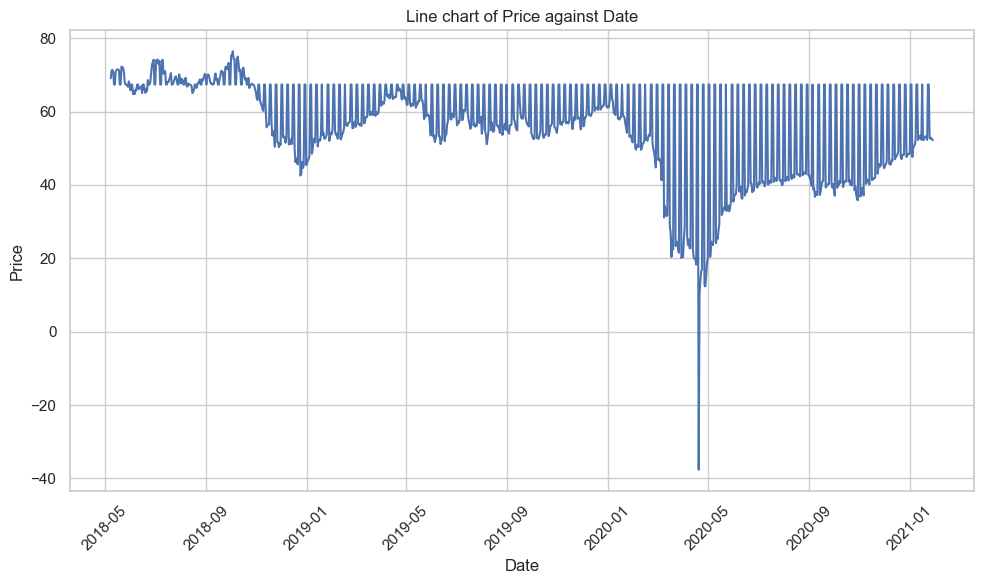

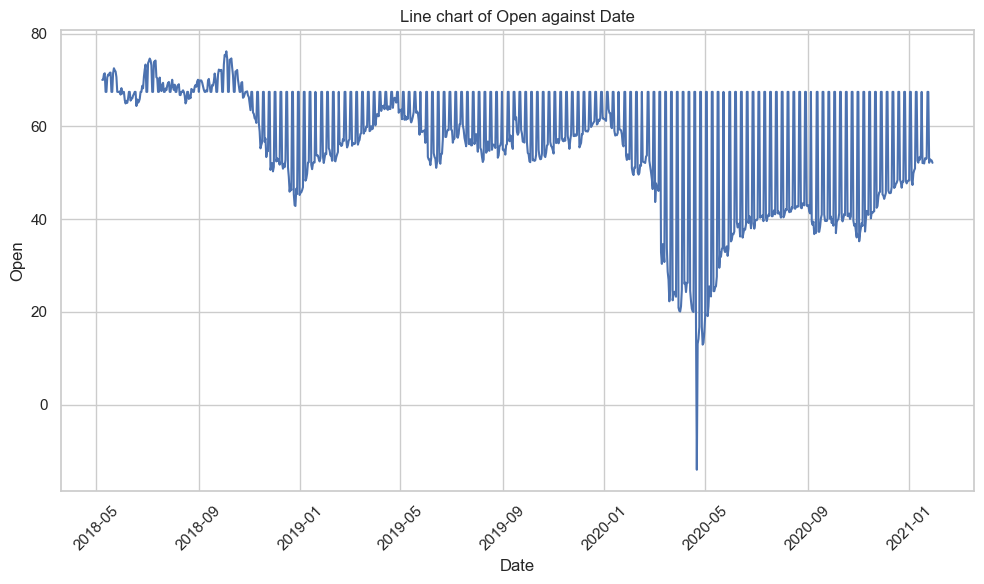

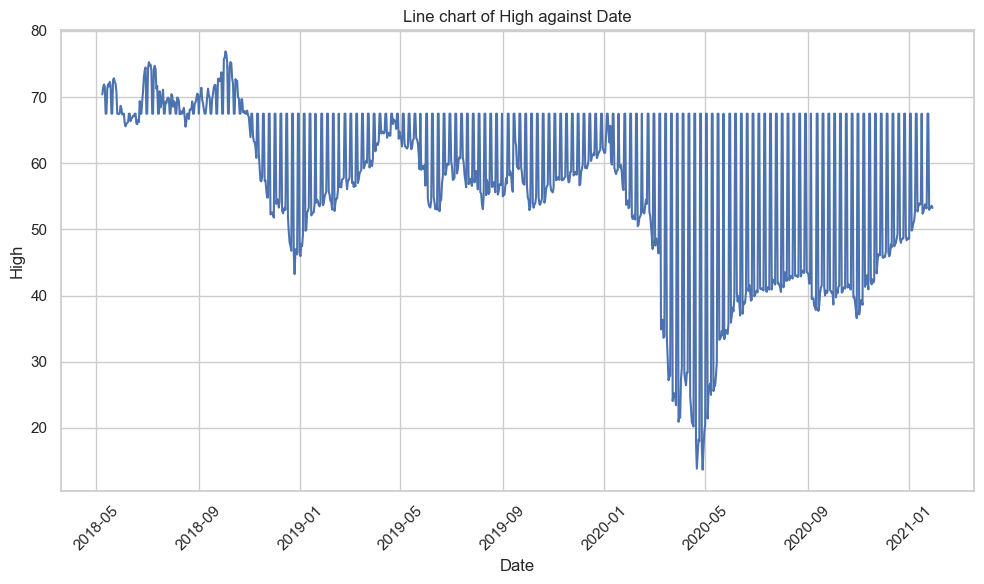

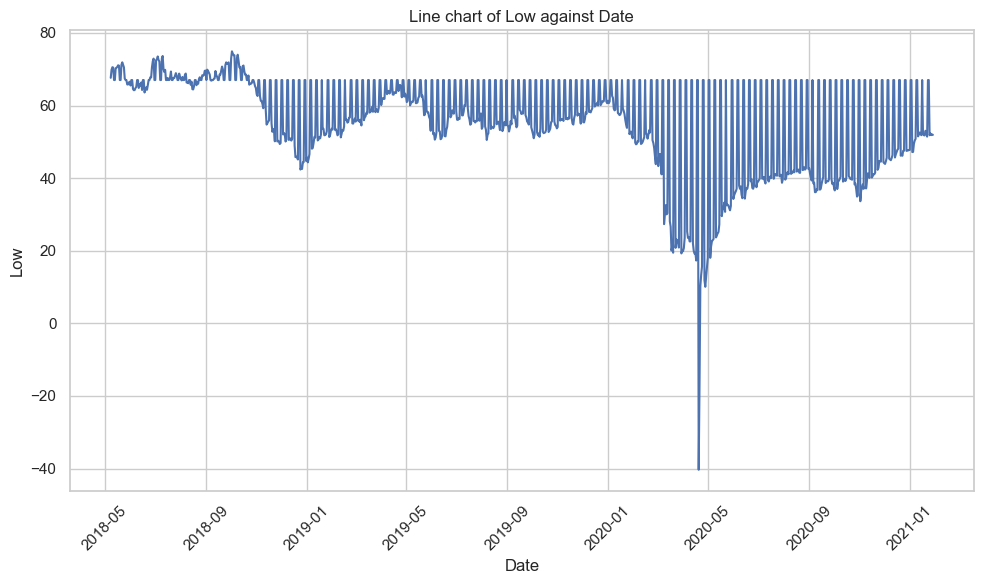

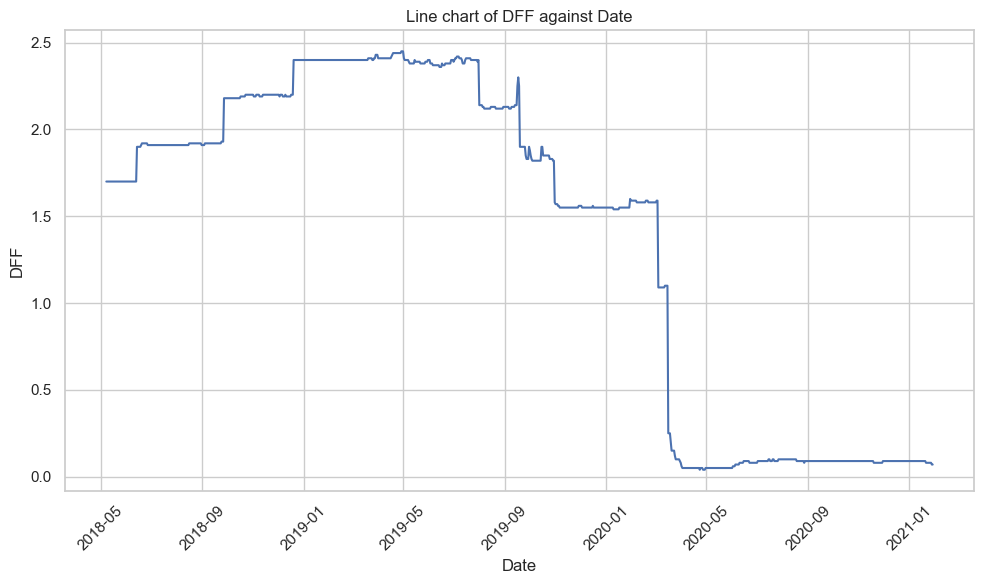

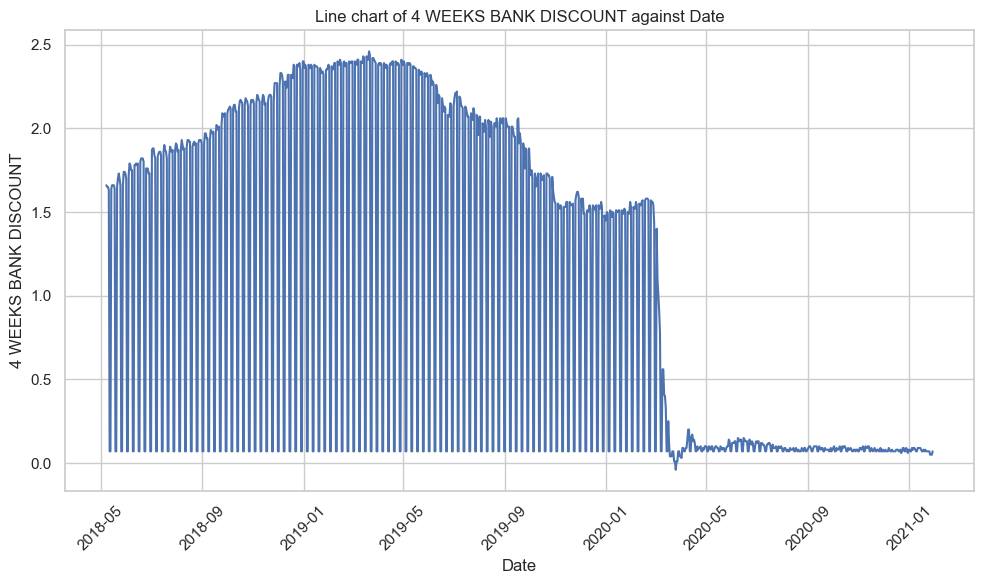

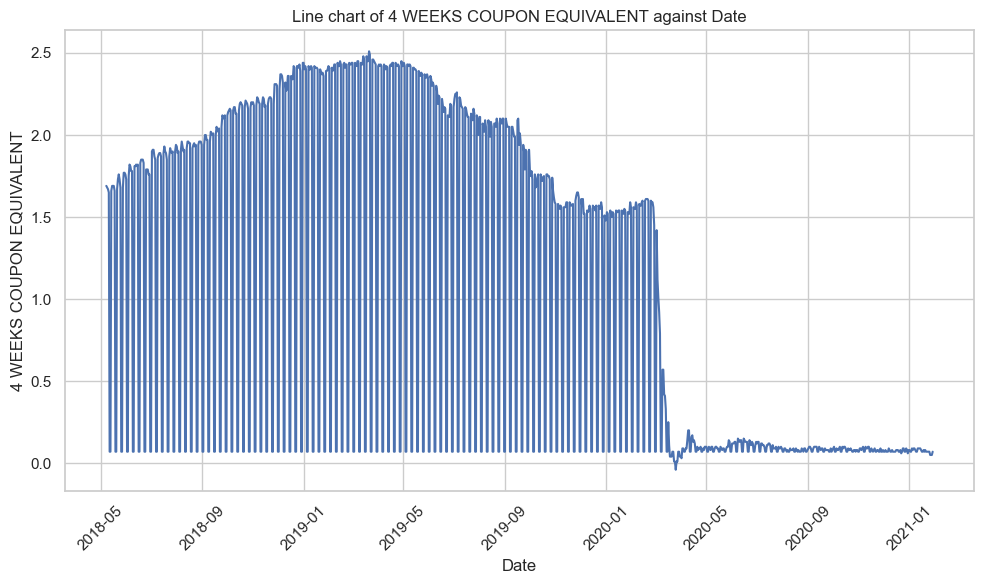

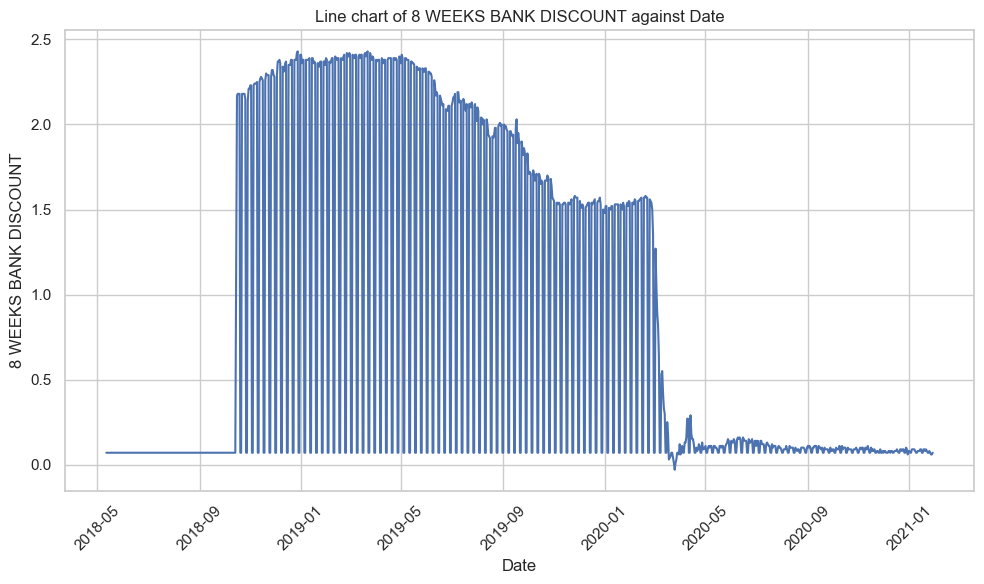

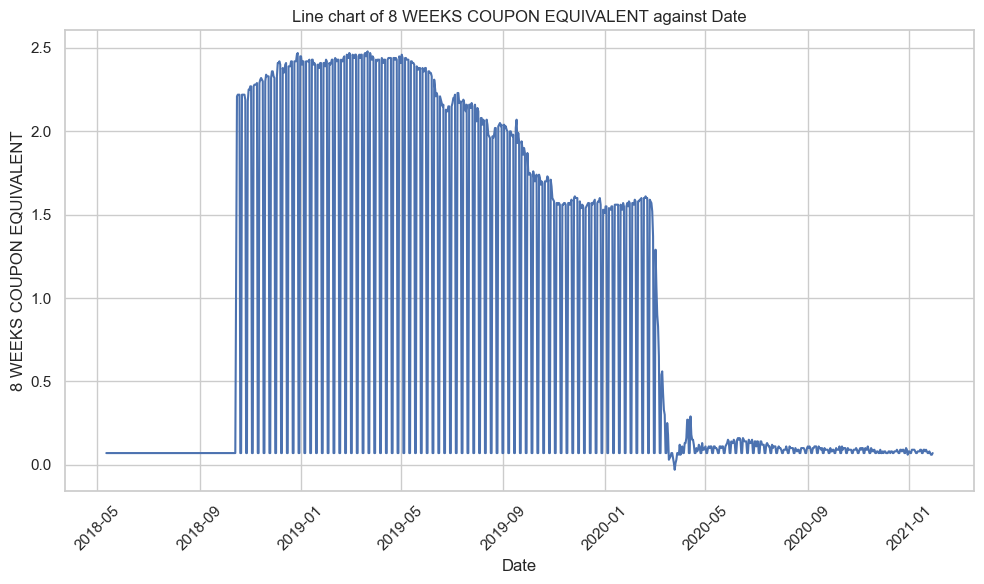

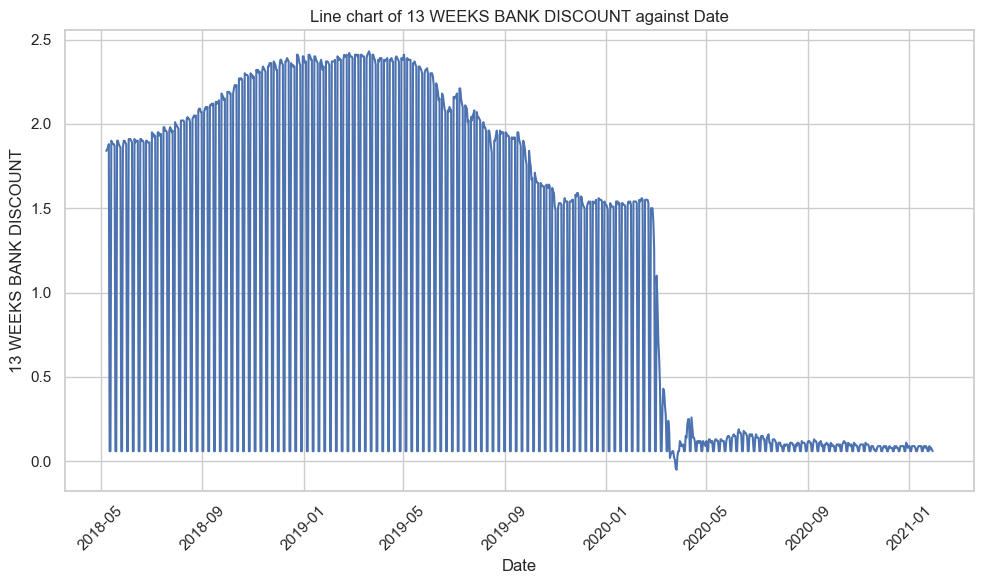

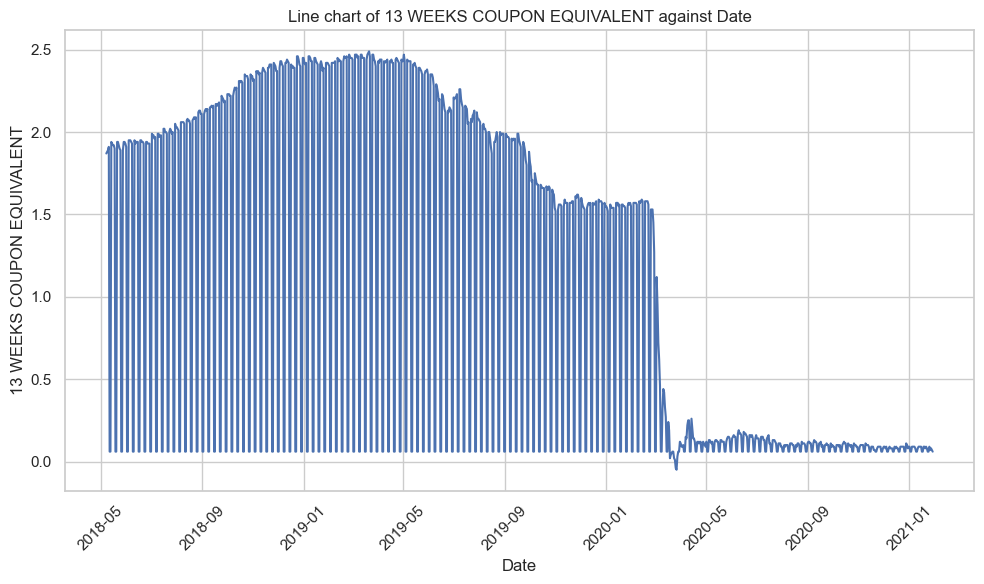

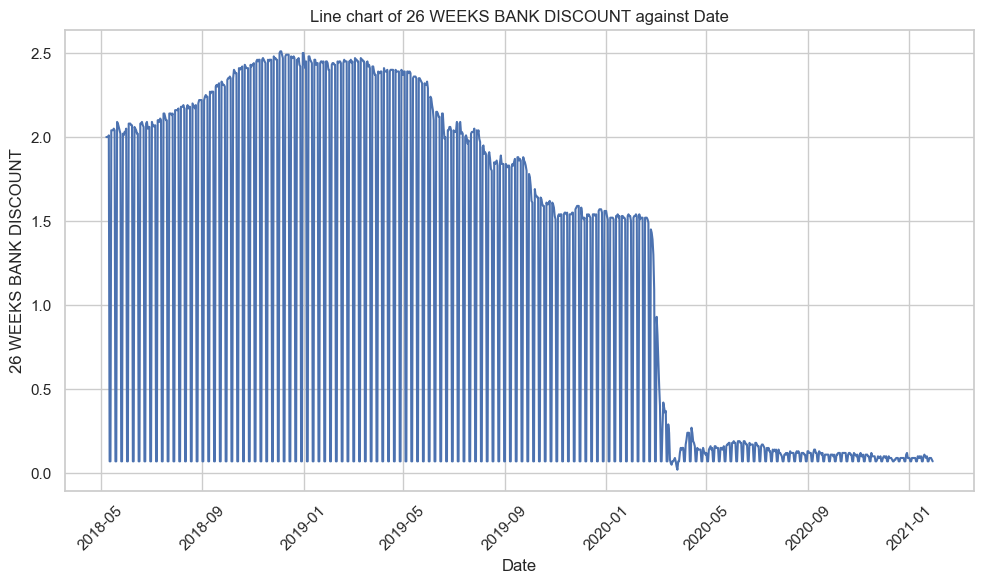

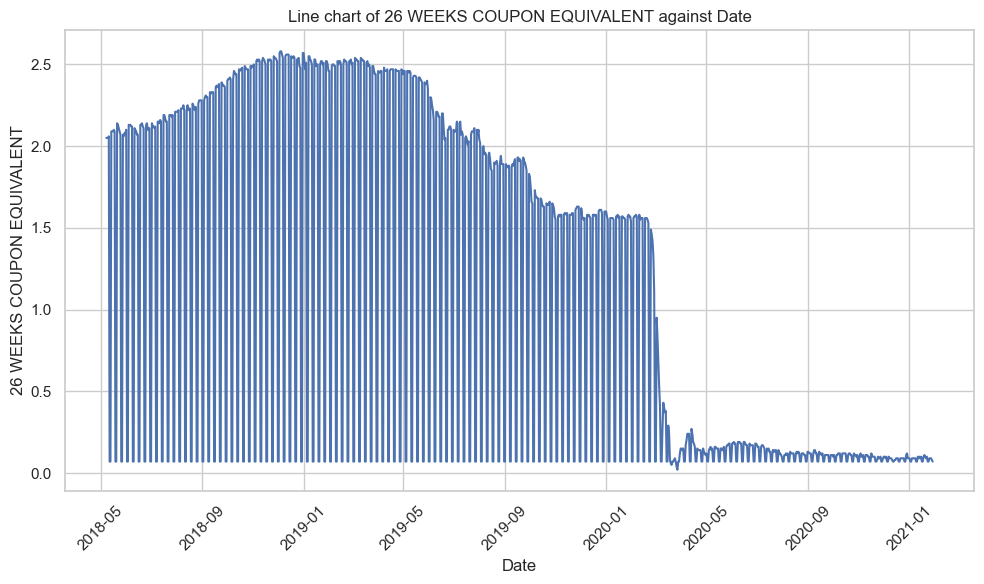

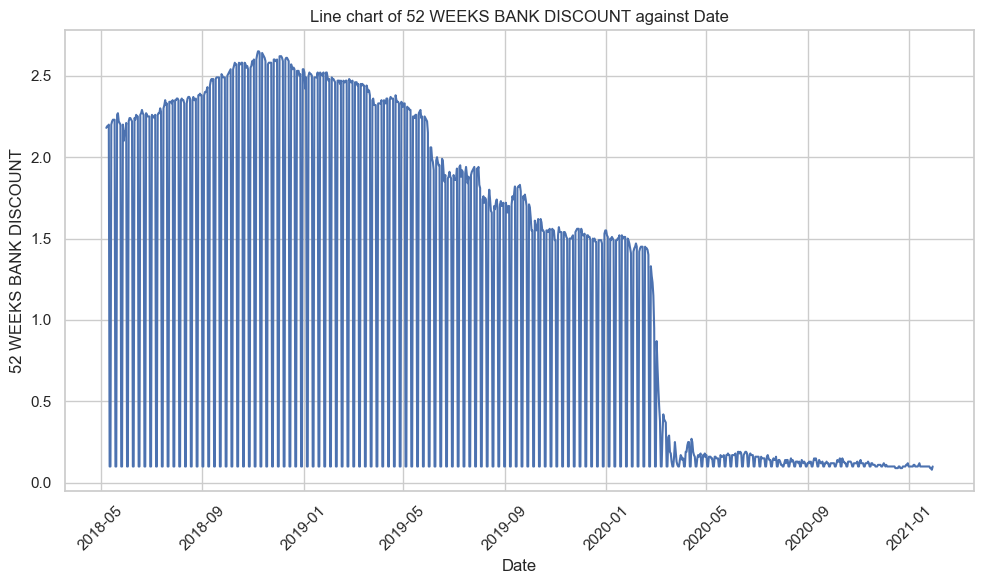

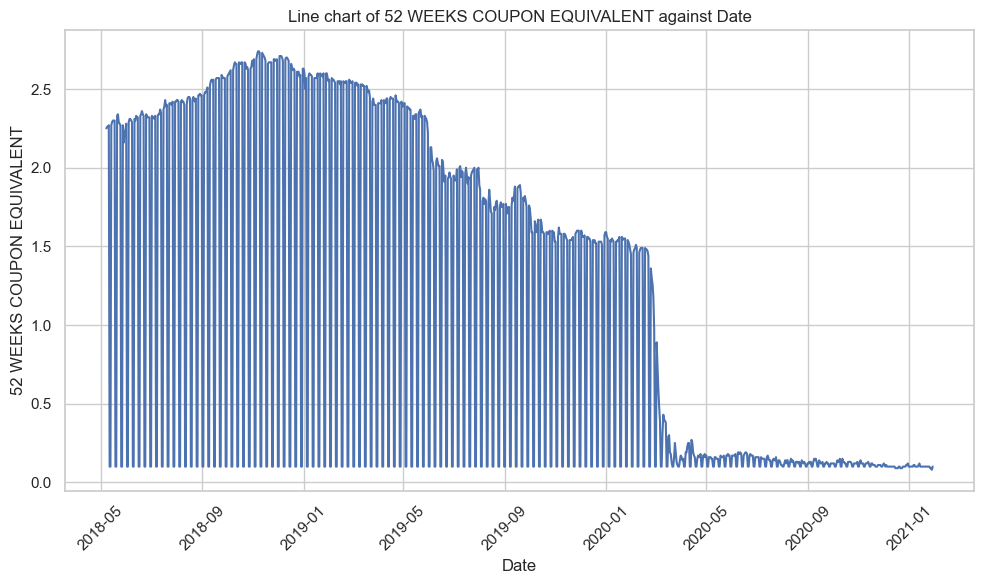

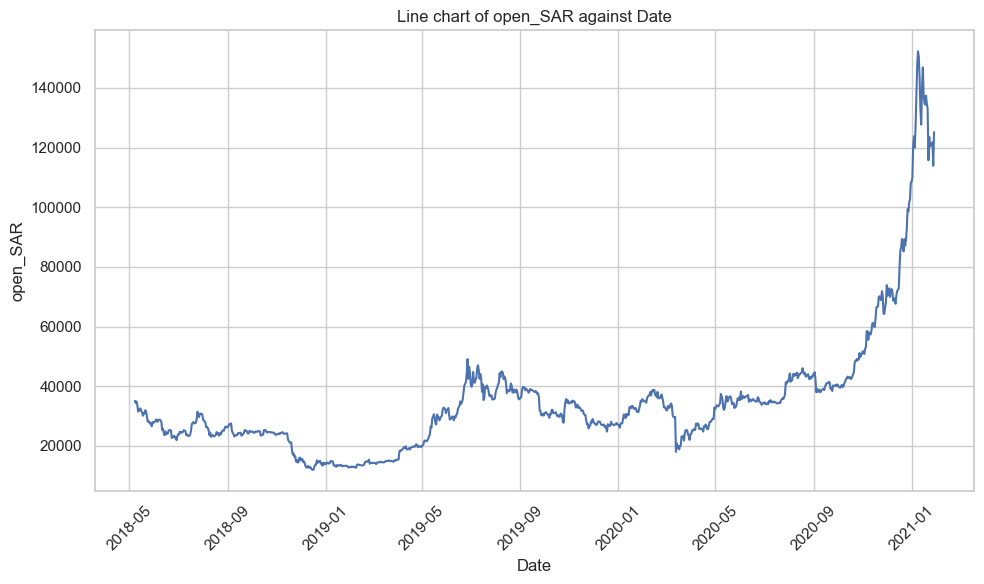

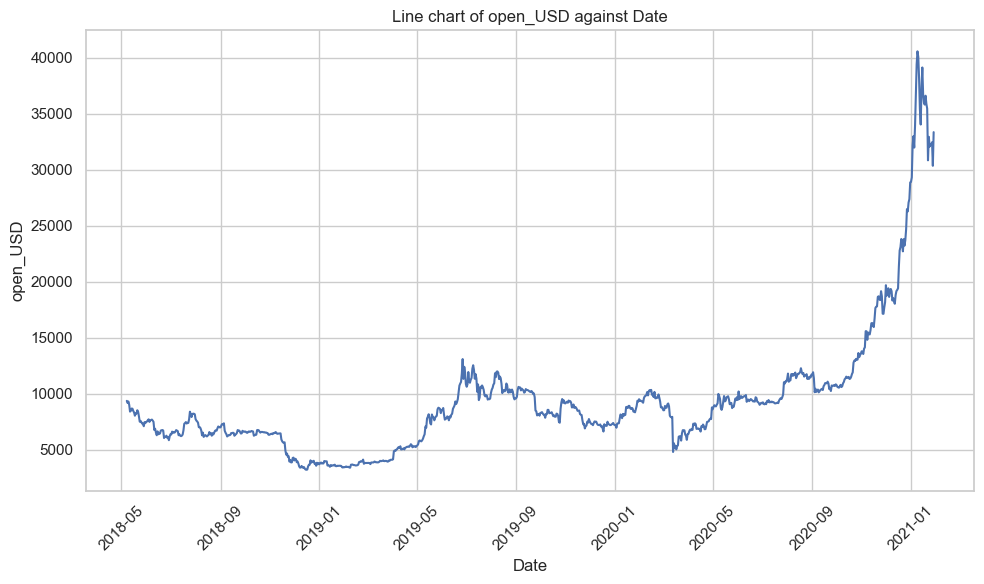

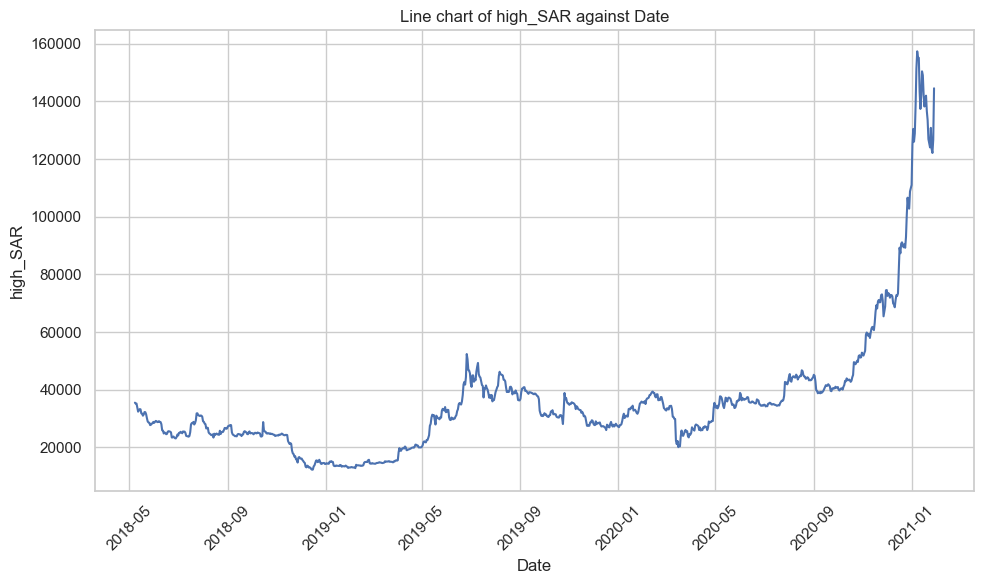

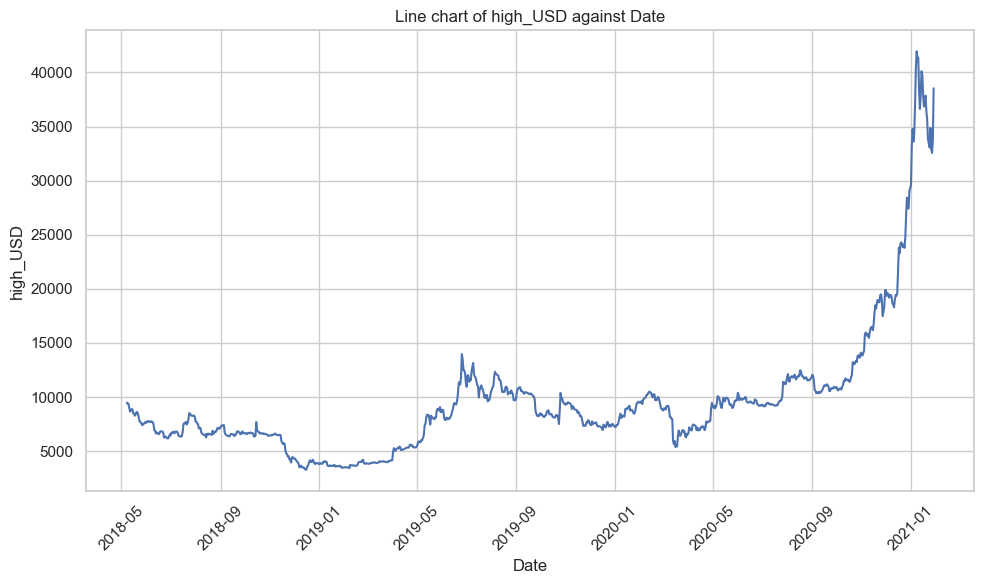

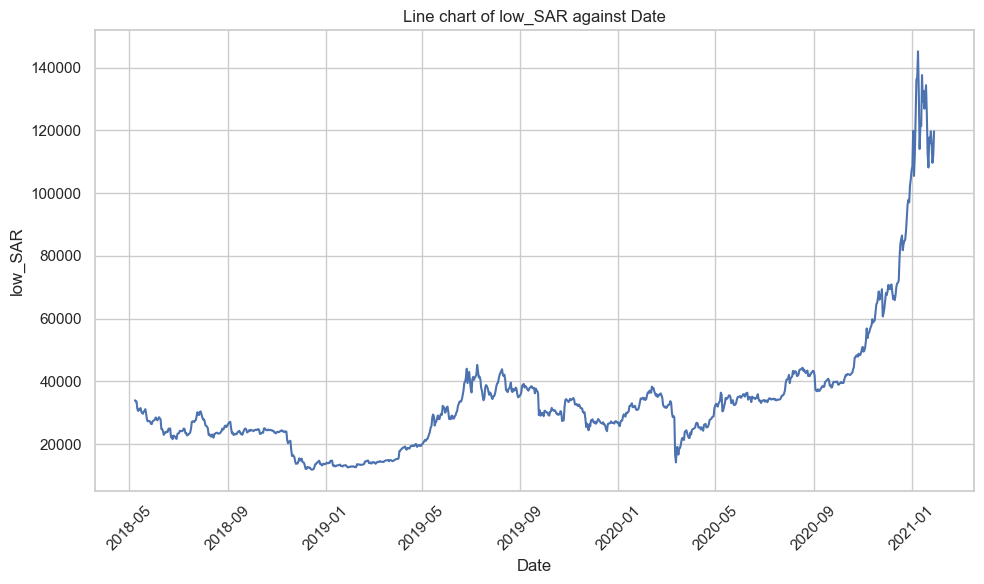

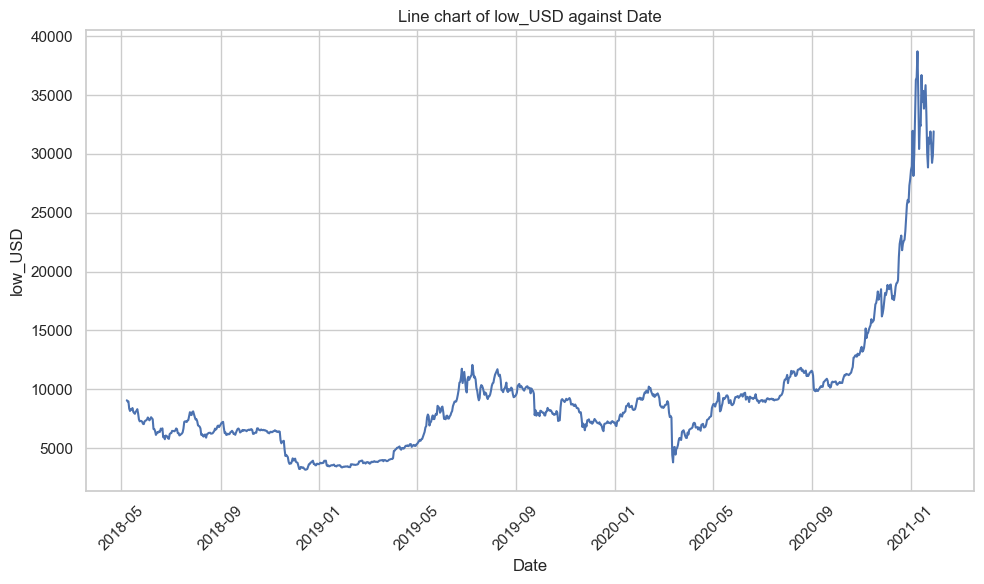

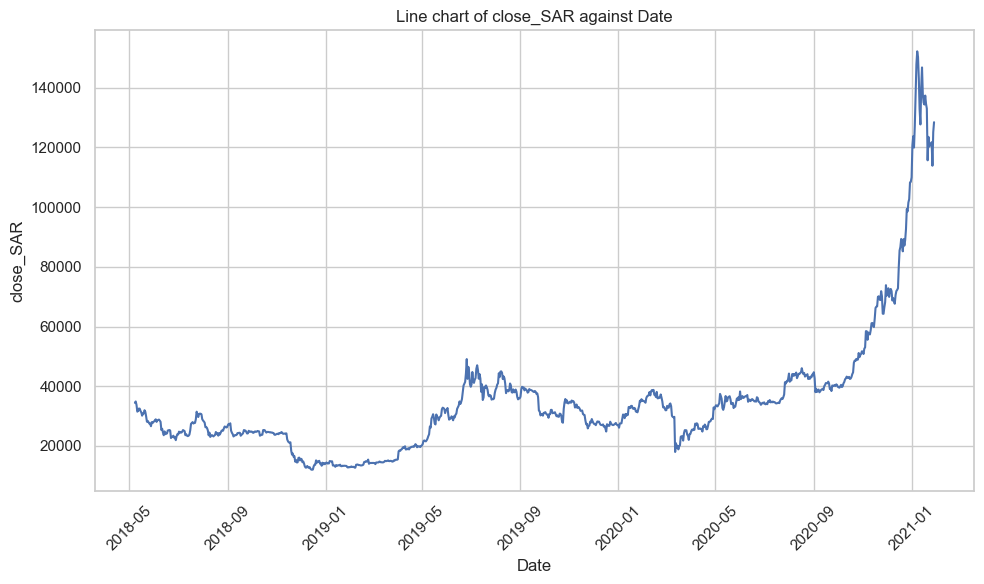

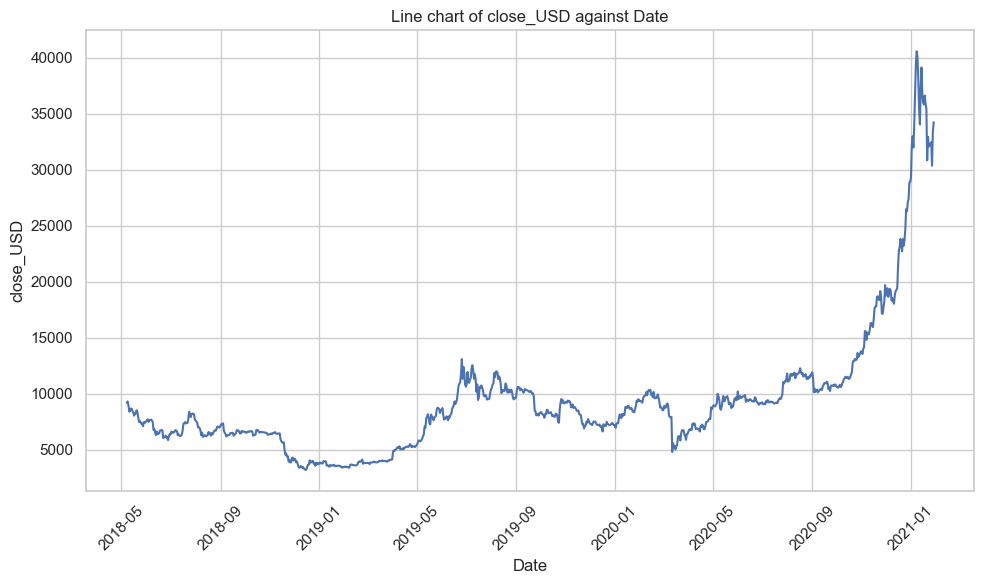

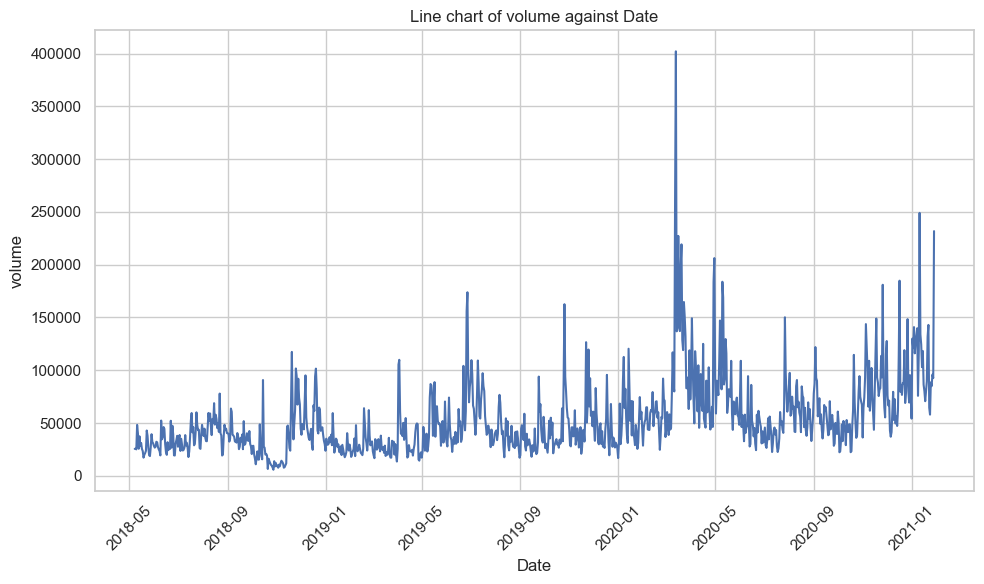

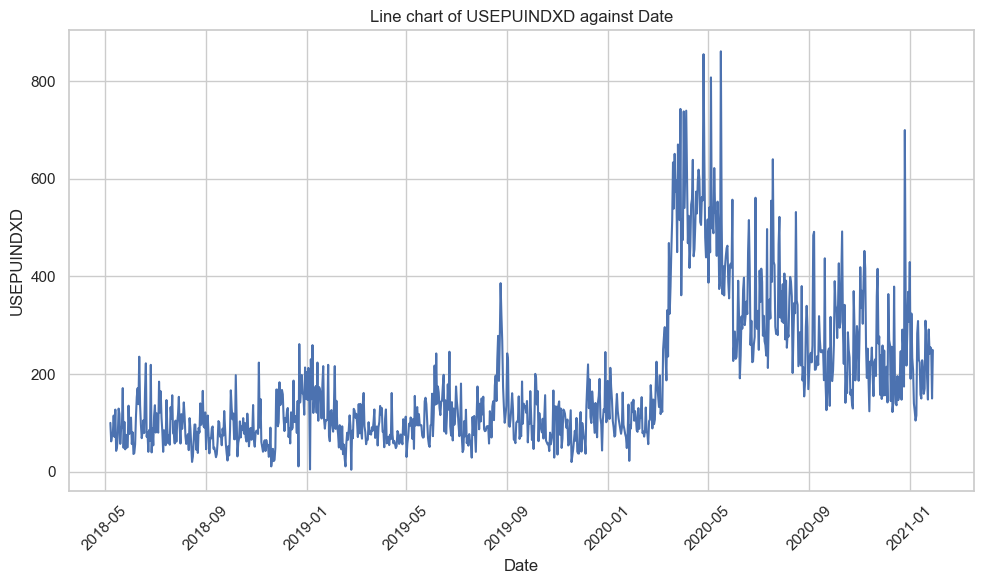

In [36]:
# Set the style of the plots
sns.set(style="whitegrid")

# Select only the numerical columns 
numerical_columns = [col for col in merged_df.columns if merged_df[col].dtype in ['float64', 'int64'] and col != 'Date']

# Plotting line charts for each numerical column against 'Date'
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(x='Date', y=column, data=merged_df)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Line chart of {column} against Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### ACF and PACF

<Figure size 800x400 with 0 Axes>

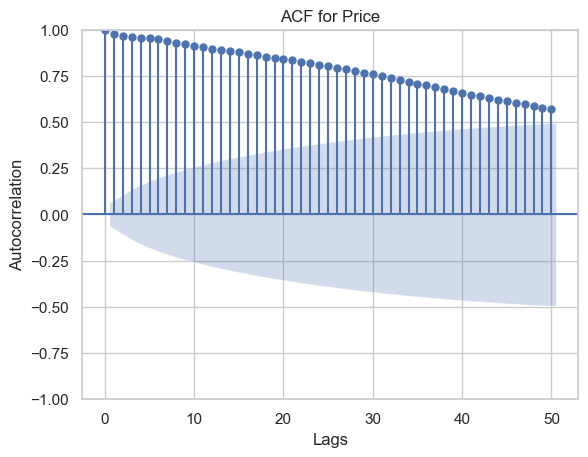

<Figure size 800x400 with 0 Axes>

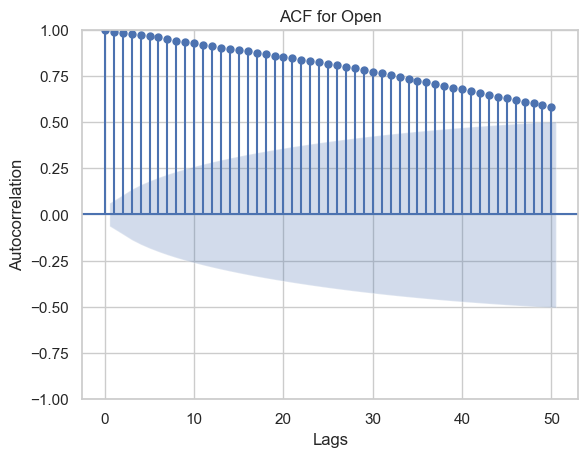

<Figure size 800x400 with 0 Axes>

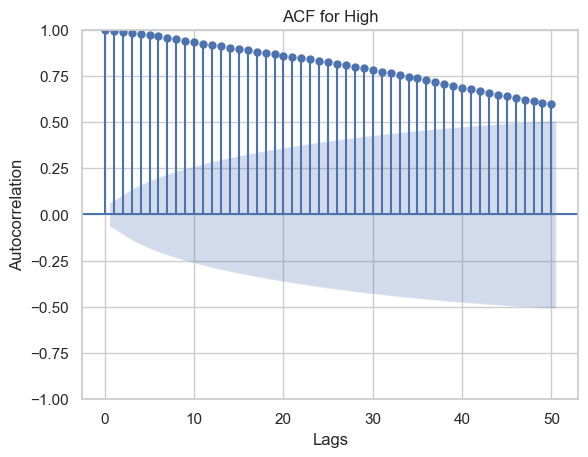

<Figure size 800x400 with 0 Axes>

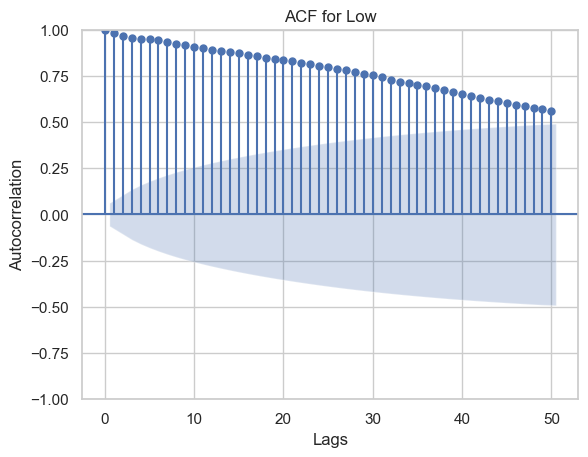

<Figure size 800x400 with 0 Axes>

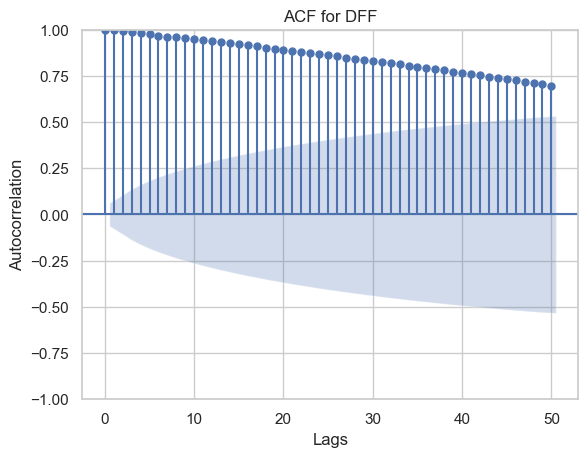

<Figure size 800x400 with 0 Axes>

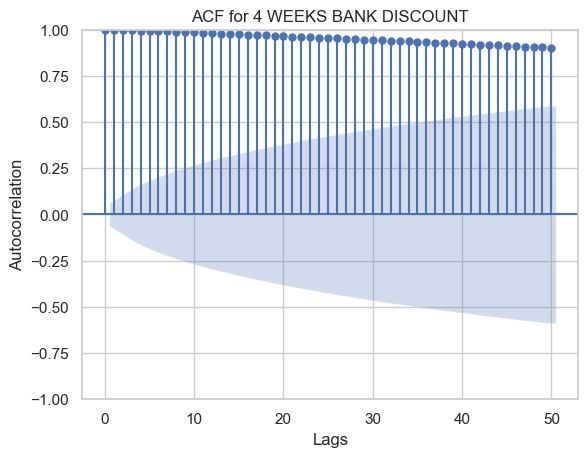

<Figure size 800x400 with 0 Axes>

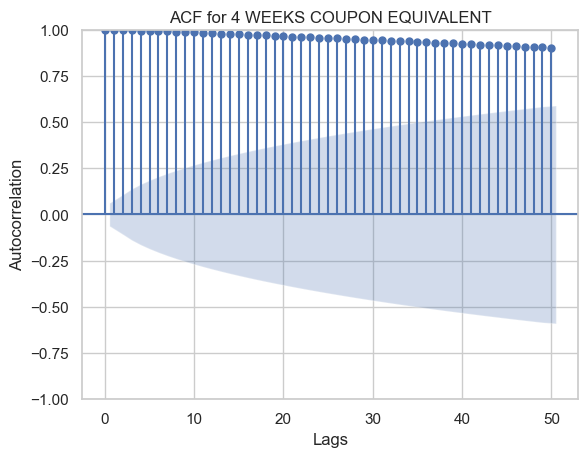

<Figure size 800x400 with 0 Axes>

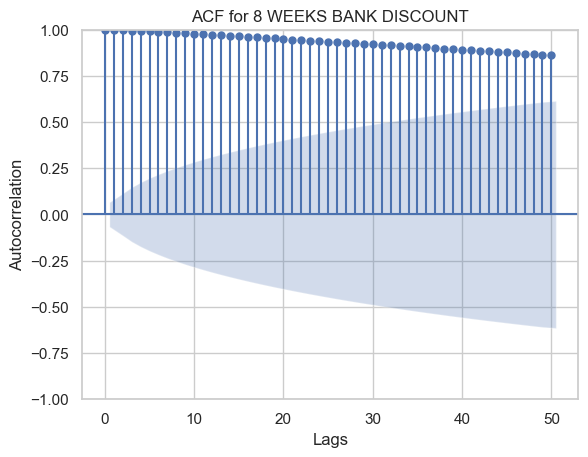

<Figure size 800x400 with 0 Axes>

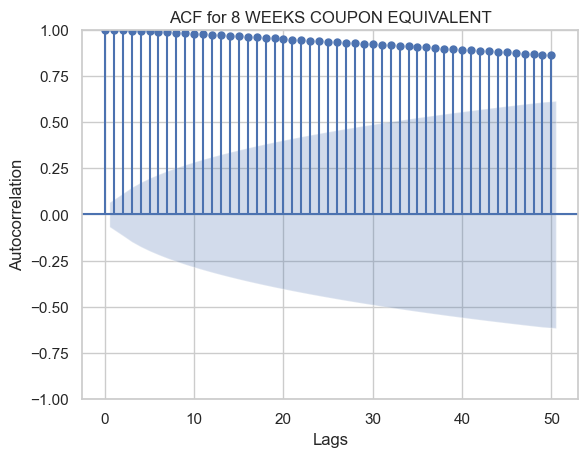

<Figure size 800x400 with 0 Axes>

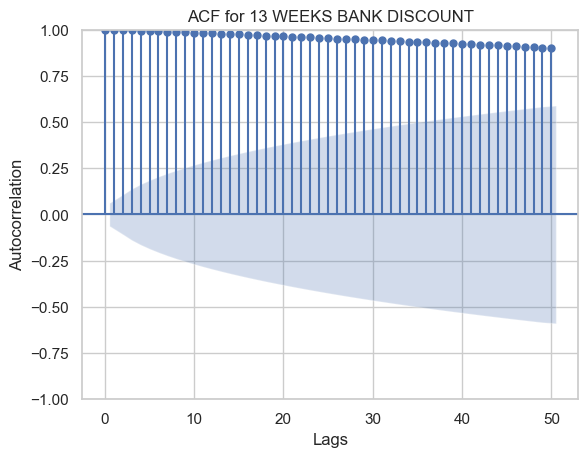

<Figure size 800x400 with 0 Axes>

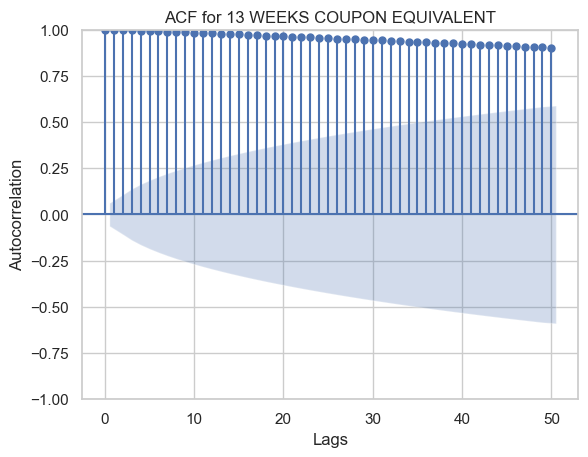

<Figure size 800x400 with 0 Axes>

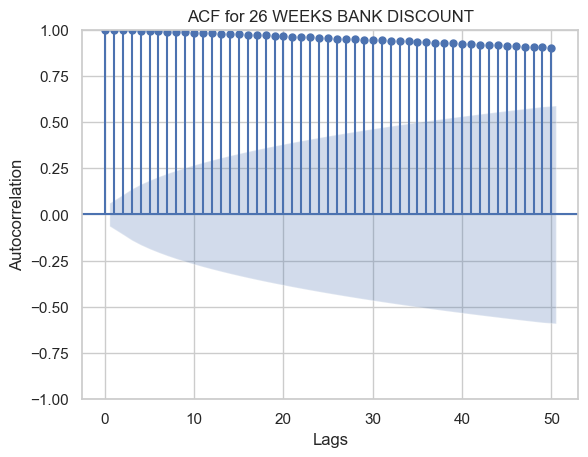

<Figure size 800x400 with 0 Axes>

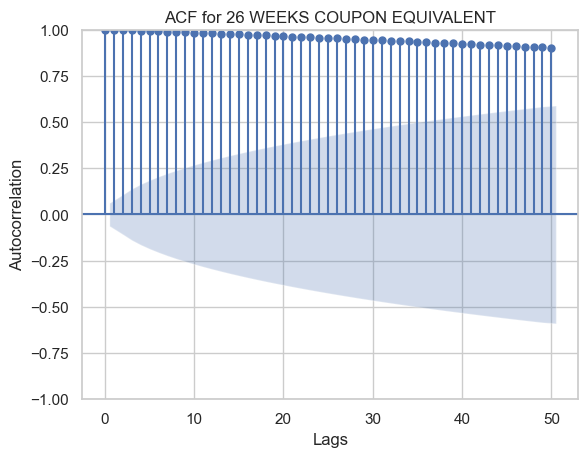

<Figure size 800x400 with 0 Axes>

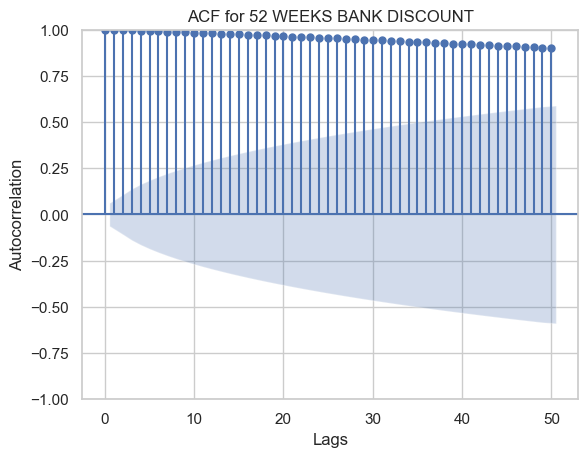

<Figure size 800x400 with 0 Axes>

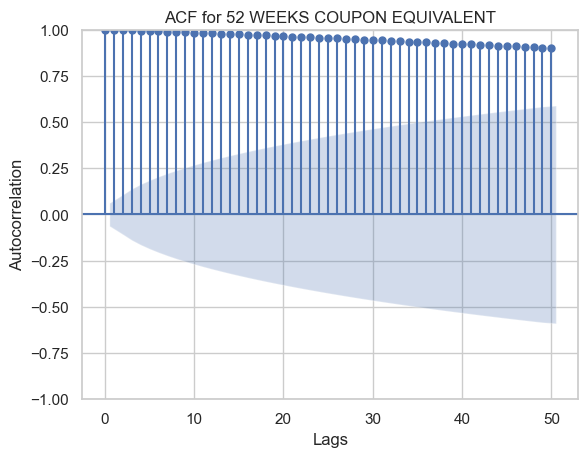

<Figure size 800x400 with 0 Axes>

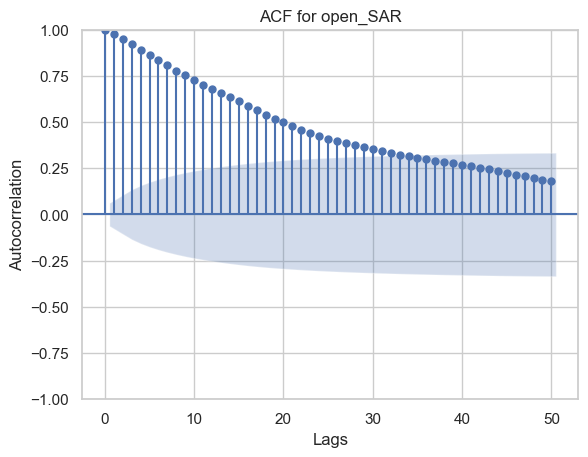

<Figure size 800x400 with 0 Axes>

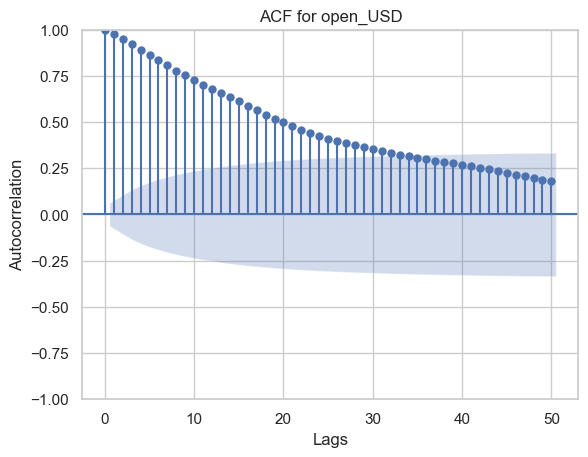

<Figure size 800x400 with 0 Axes>

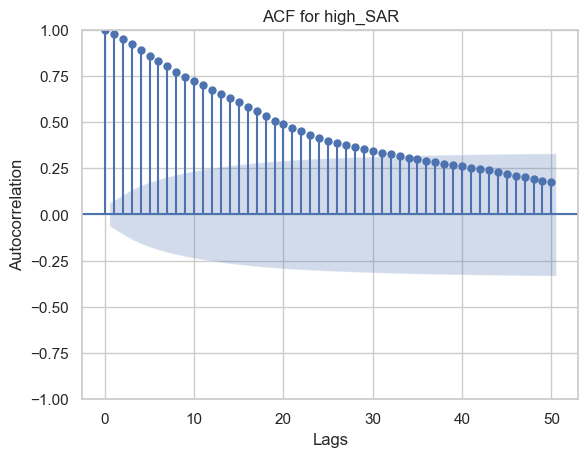

<Figure size 800x400 with 0 Axes>

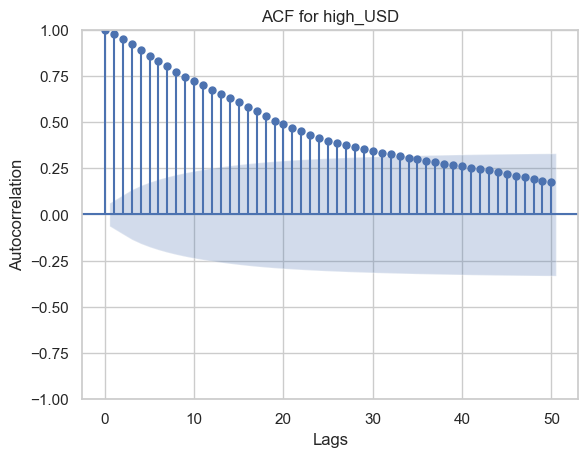

<Figure size 800x400 with 0 Axes>

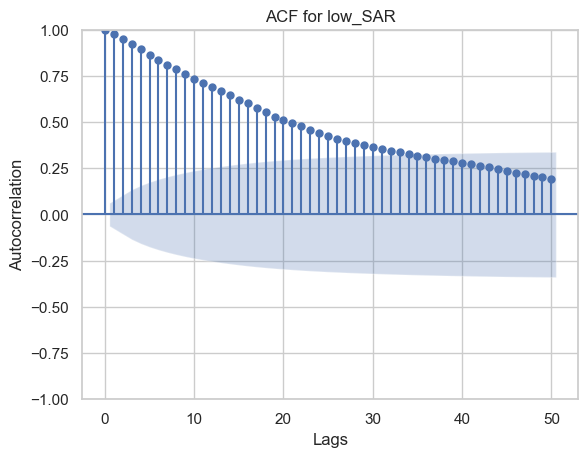

<Figure size 800x400 with 0 Axes>

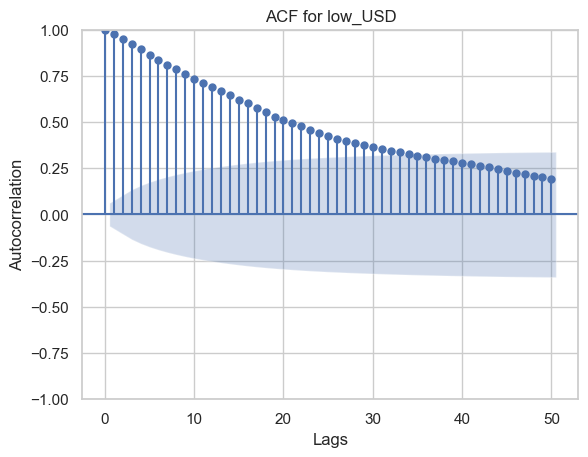

<Figure size 800x400 with 0 Axes>

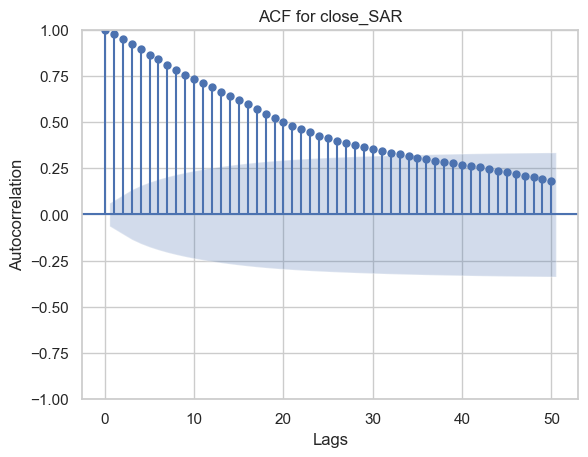

<Figure size 800x400 with 0 Axes>

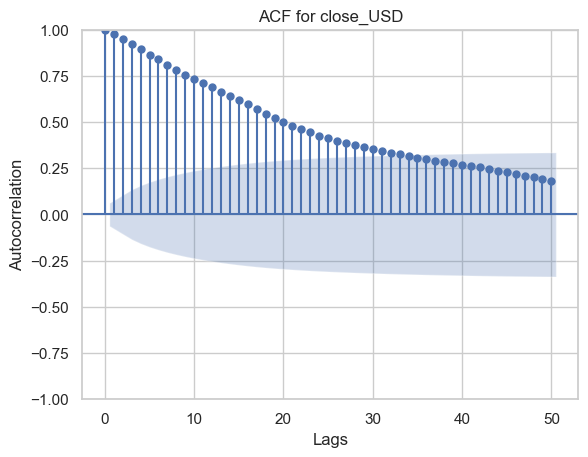

<Figure size 800x400 with 0 Axes>

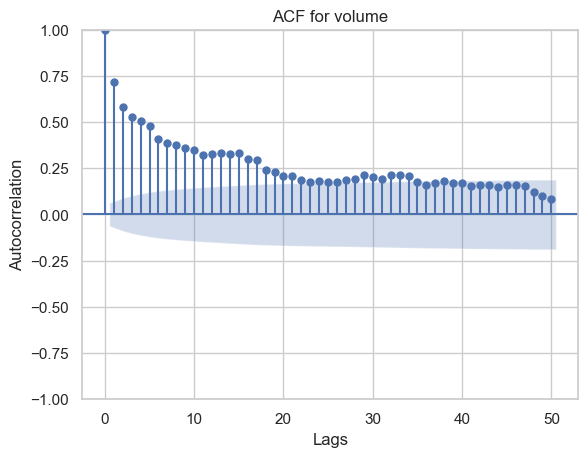

<Figure size 800x400 with 0 Axes>

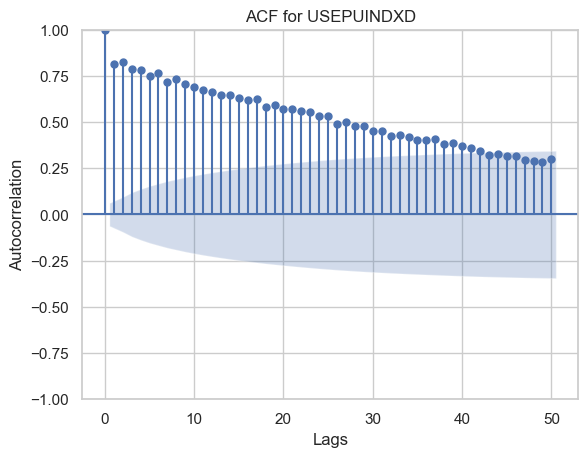

In [21]:
# Select only the numerical columns
numerical_columns = merged_df.select_dtypes(include='number').columns.tolist()

# Plot ACF for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plot_acf(merged_df[column].dropna(), lags=50)
    plt.title(f'ACF for {column}')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.show()

<Figure size 800x400 with 0 Axes>

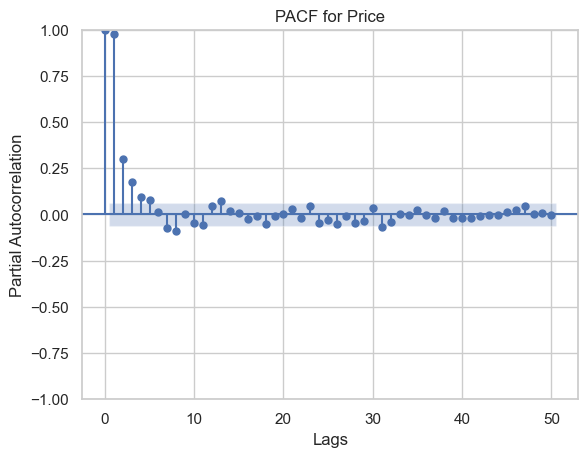

<Figure size 800x400 with 0 Axes>

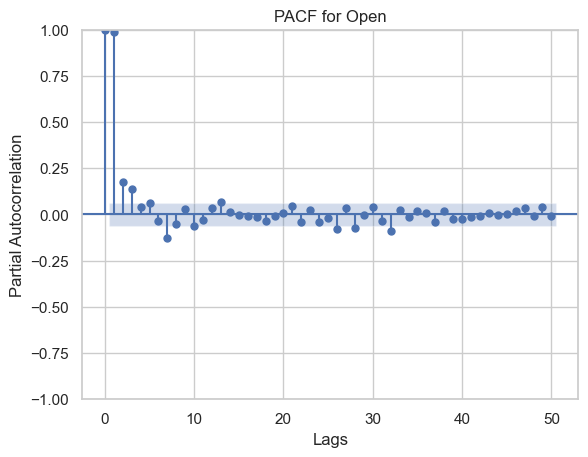

<Figure size 800x400 with 0 Axes>

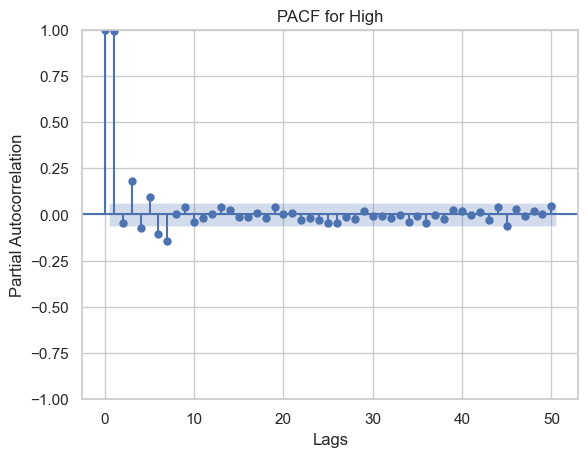

<Figure size 800x400 with 0 Axes>

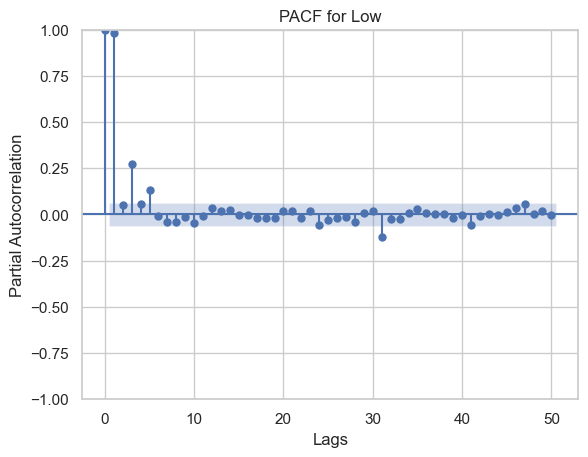

<Figure size 800x400 with 0 Axes>

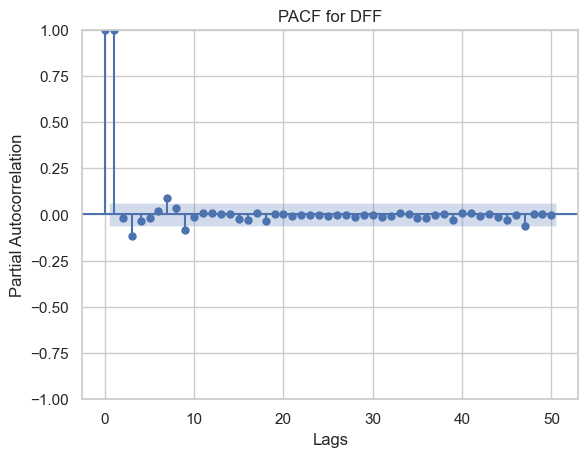

<Figure size 800x400 with 0 Axes>

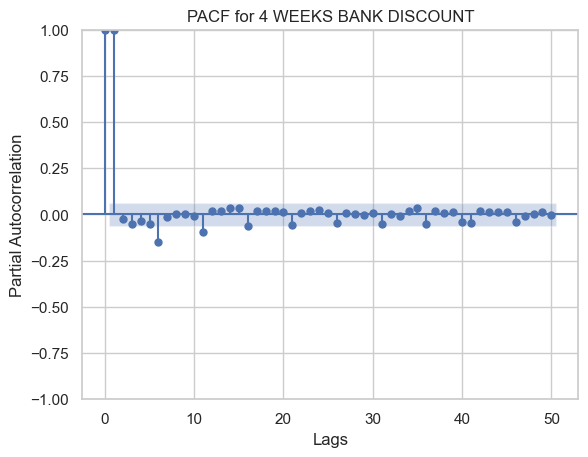

<Figure size 800x400 with 0 Axes>

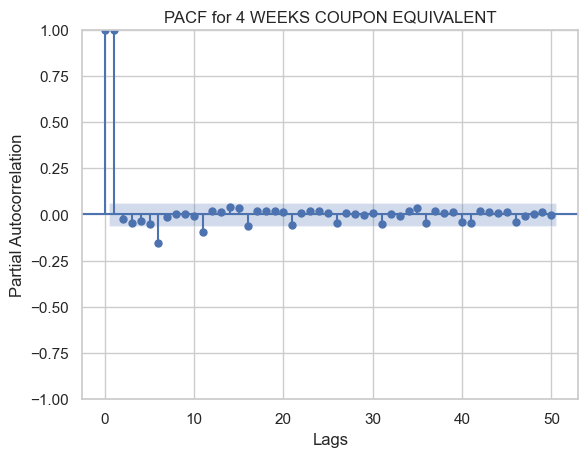

<Figure size 800x400 with 0 Axes>

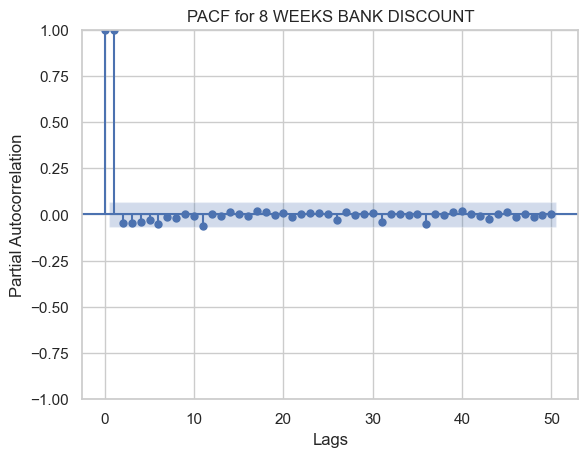

<Figure size 800x400 with 0 Axes>

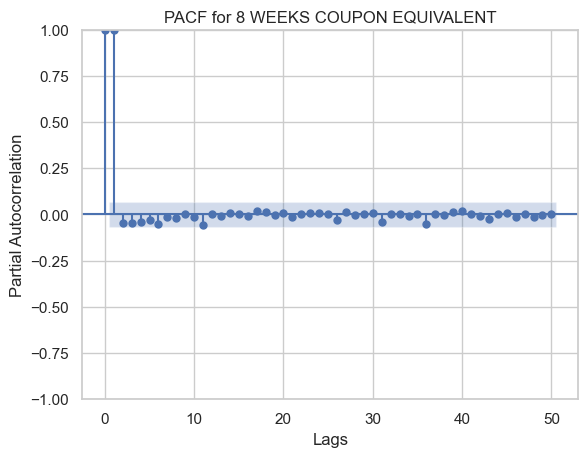

<Figure size 800x400 with 0 Axes>

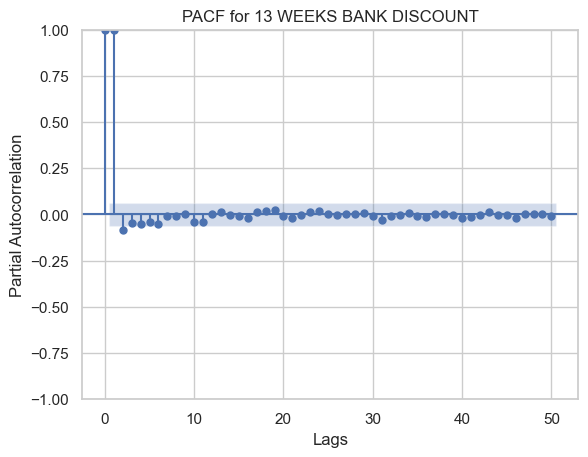

<Figure size 800x400 with 0 Axes>

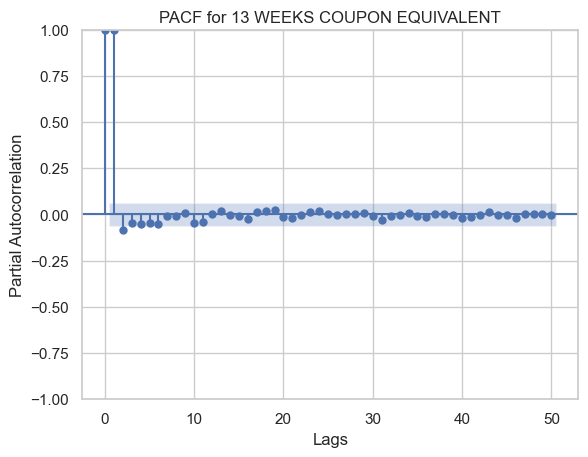

<Figure size 800x400 with 0 Axes>

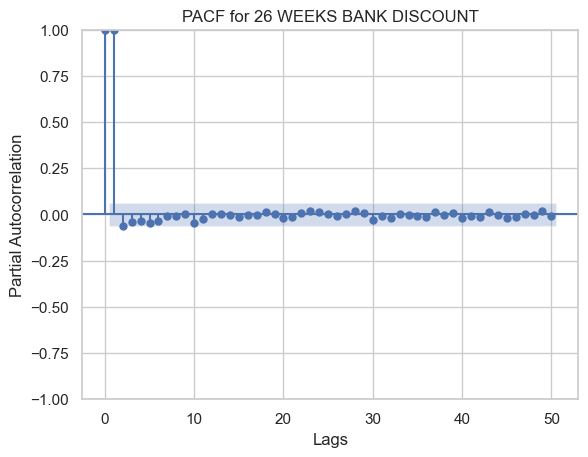

<Figure size 800x400 with 0 Axes>

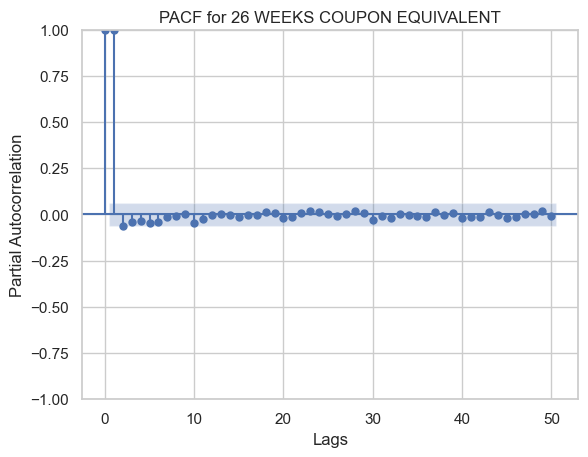

<Figure size 800x400 with 0 Axes>

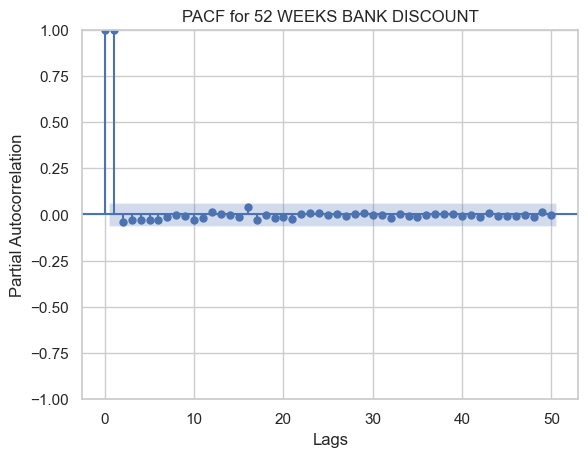

<Figure size 800x400 with 0 Axes>

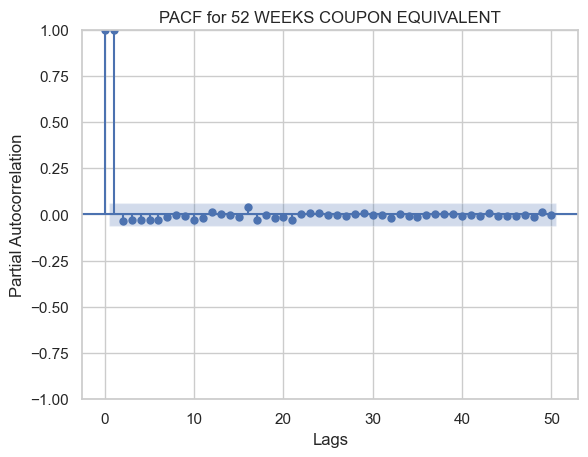

<Figure size 800x400 with 0 Axes>

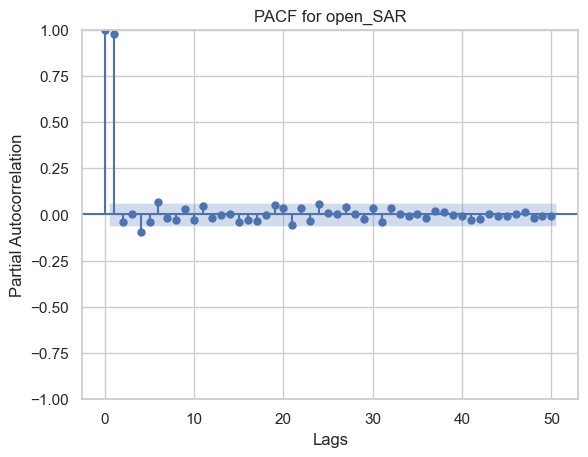

<Figure size 800x400 with 0 Axes>

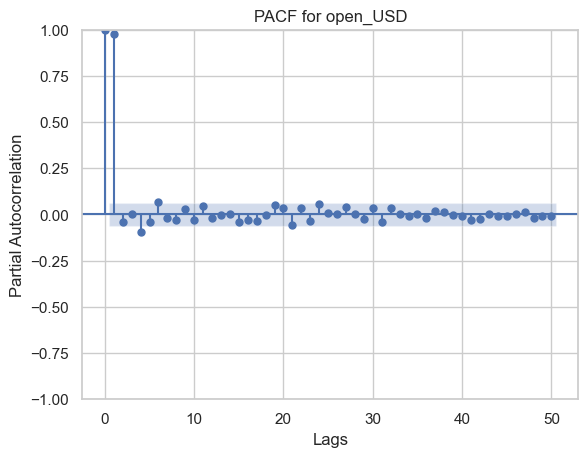

<Figure size 800x400 with 0 Axes>

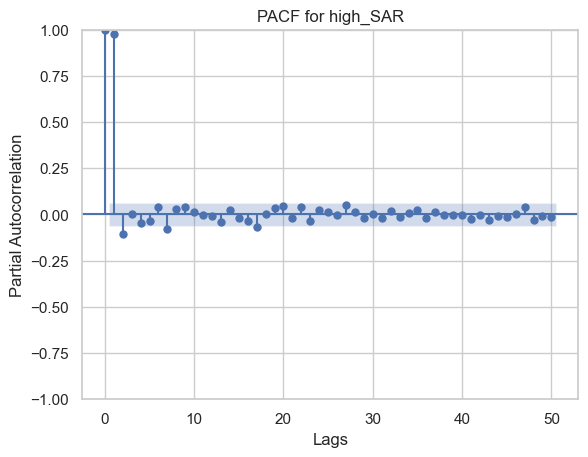

<Figure size 800x400 with 0 Axes>

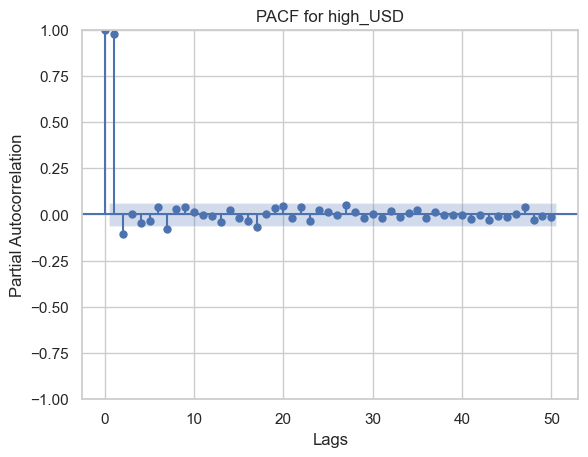

<Figure size 800x400 with 0 Axes>

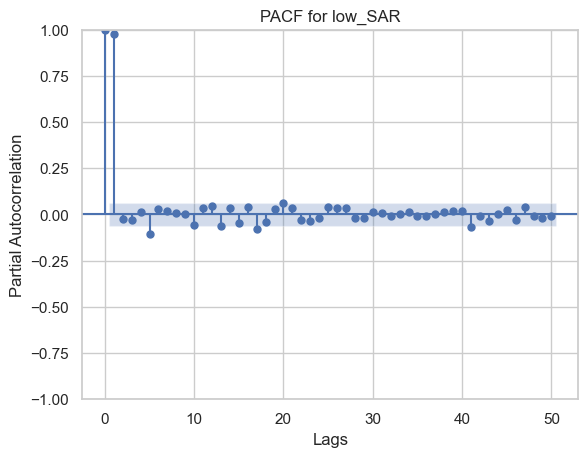

<Figure size 800x400 with 0 Axes>

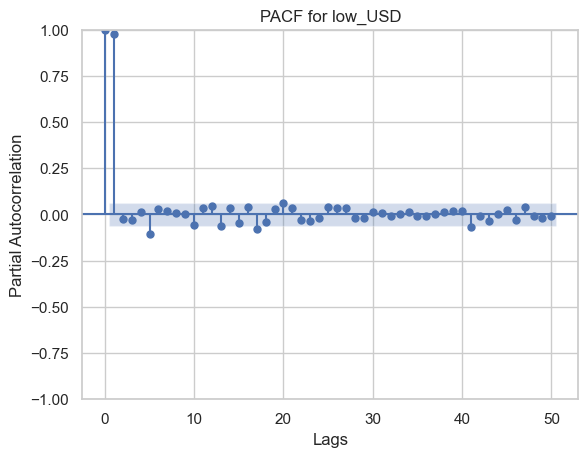

<Figure size 800x400 with 0 Axes>

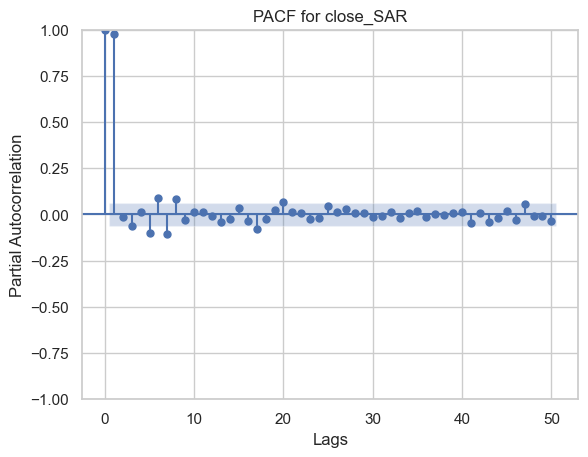

<Figure size 800x400 with 0 Axes>

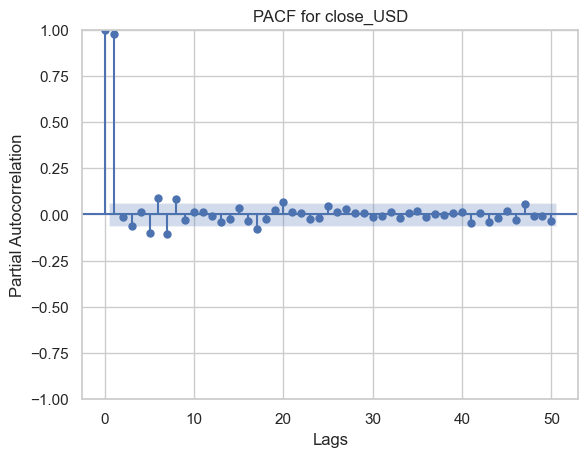

<Figure size 800x400 with 0 Axes>

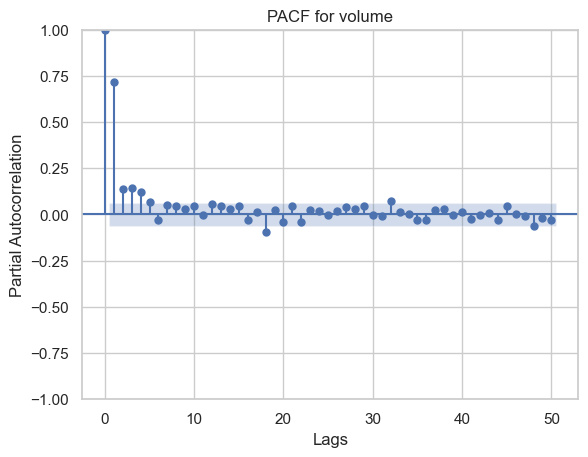

<Figure size 800x400 with 0 Axes>

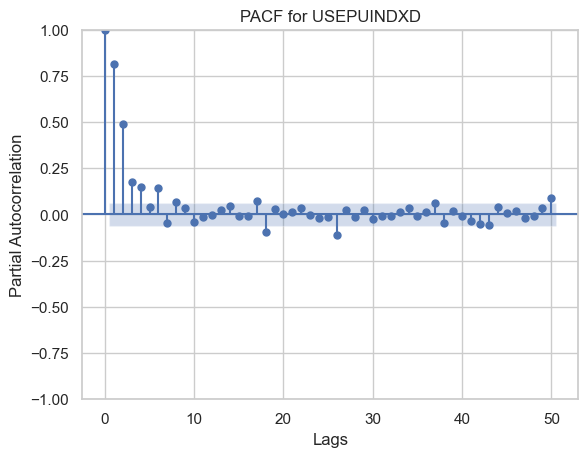

In [22]:
# Select only the numerical columns
numerical_columns = merged_df.select_dtypes(include='number').columns.tolist()


# Plot PACF for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plot_pacf(merged_df[column].dropna(), lags=50)
    plt.title(f'PACF for {column}')
    plt.xlabel('Lags')
    plt.ylabel('Partial Autocorrelation')
    plt.show()

### ACF and PACF with Differencing

<Figure size 800x400 with 0 Axes>

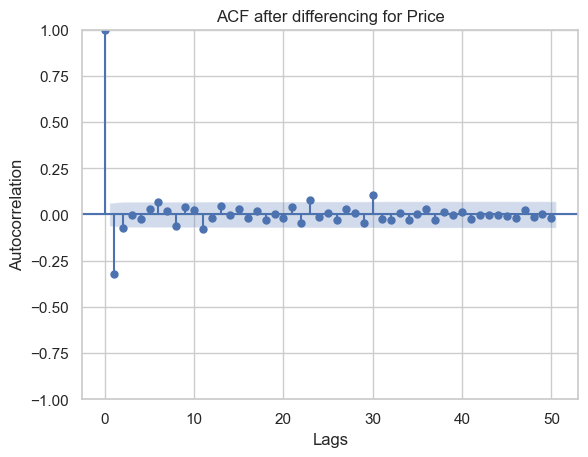

<Figure size 800x400 with 0 Axes>

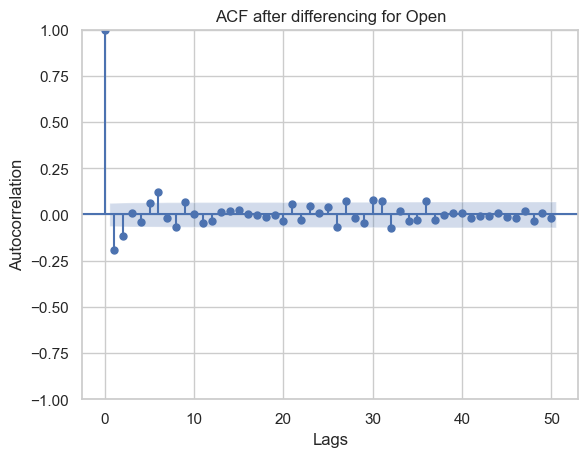

<Figure size 800x400 with 0 Axes>

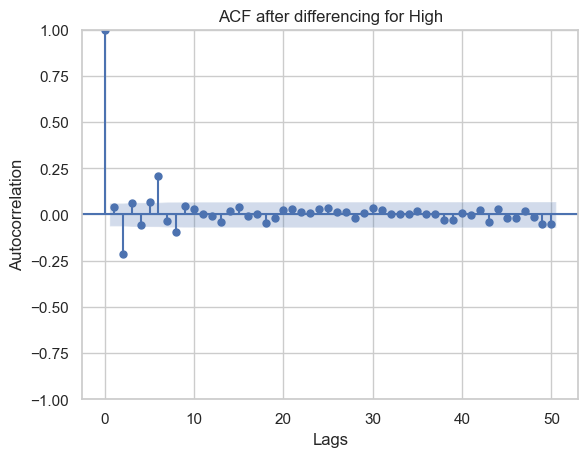

<Figure size 800x400 with 0 Axes>

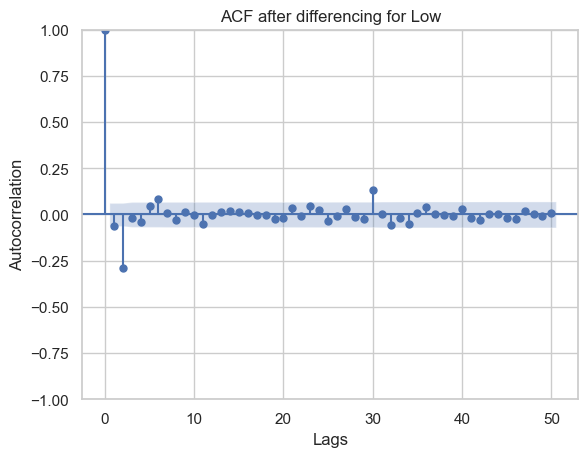

<Figure size 800x400 with 0 Axes>

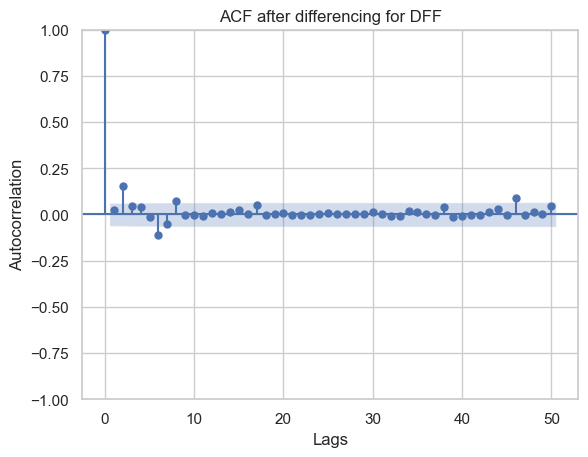

<Figure size 800x400 with 0 Axes>

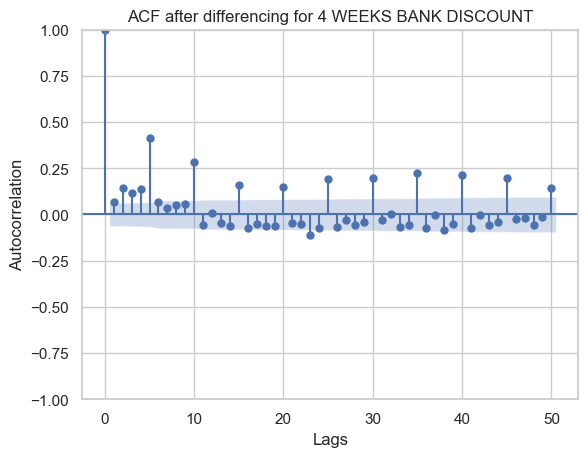

<Figure size 800x400 with 0 Axes>

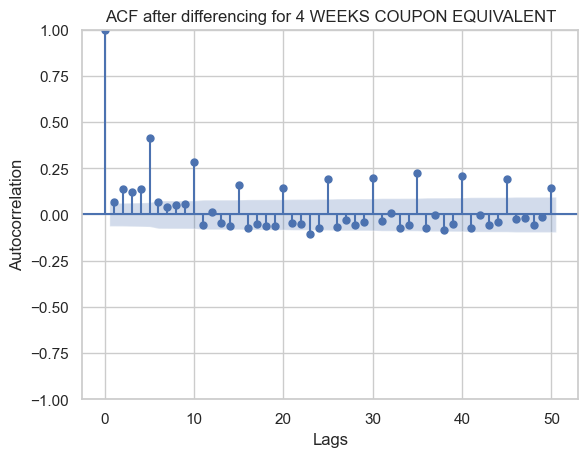

<Figure size 800x400 with 0 Axes>

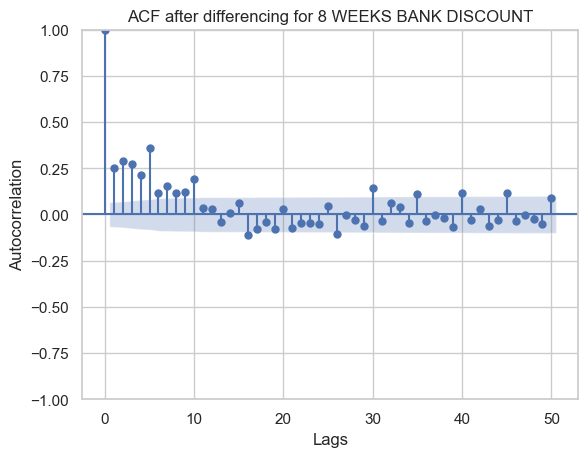

<Figure size 800x400 with 0 Axes>

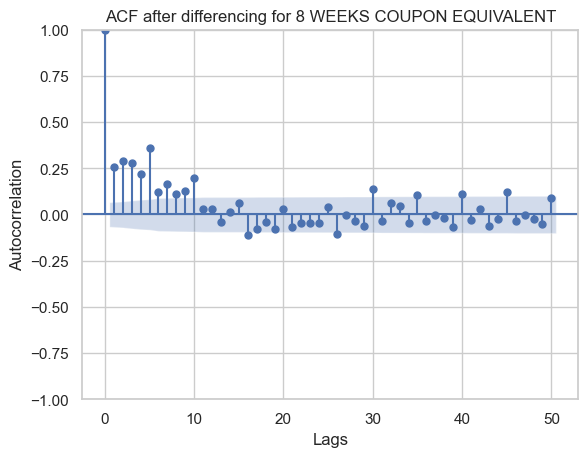

<Figure size 800x400 with 0 Axes>

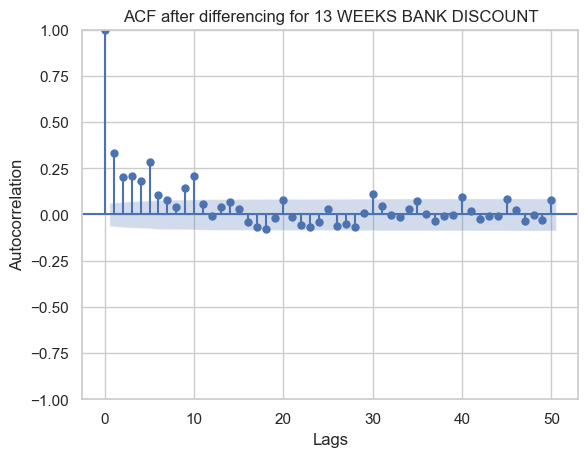

<Figure size 800x400 with 0 Axes>

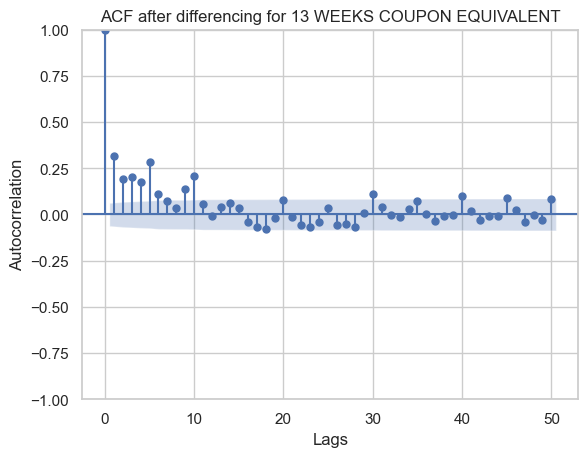

<Figure size 800x400 with 0 Axes>

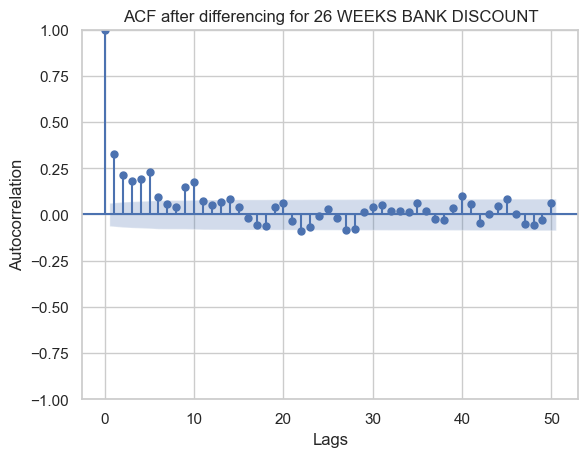

<Figure size 800x400 with 0 Axes>

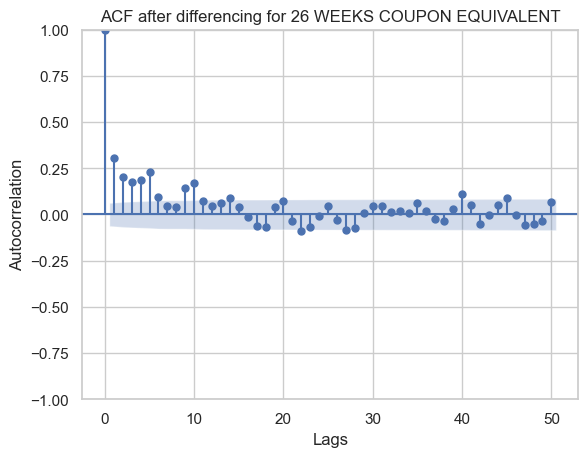

<Figure size 800x400 with 0 Axes>

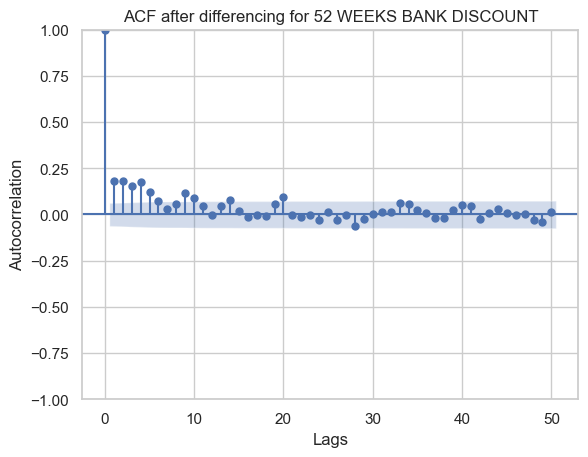

<Figure size 800x400 with 0 Axes>

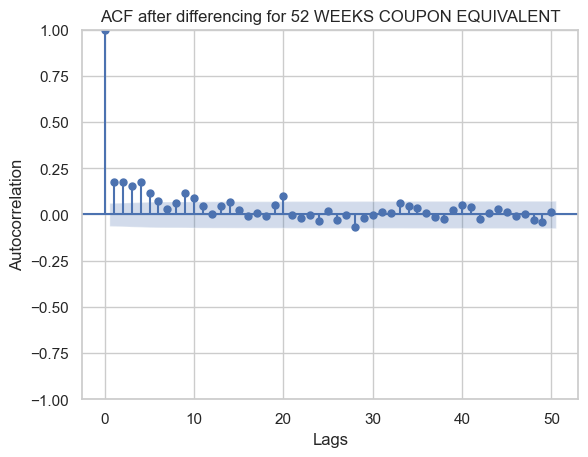

<Figure size 800x400 with 0 Axes>

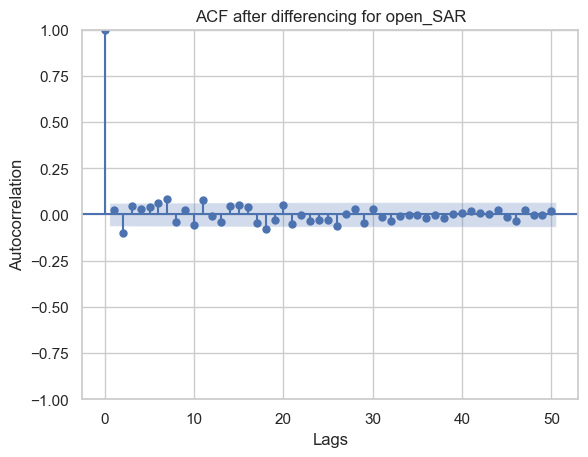

<Figure size 800x400 with 0 Axes>

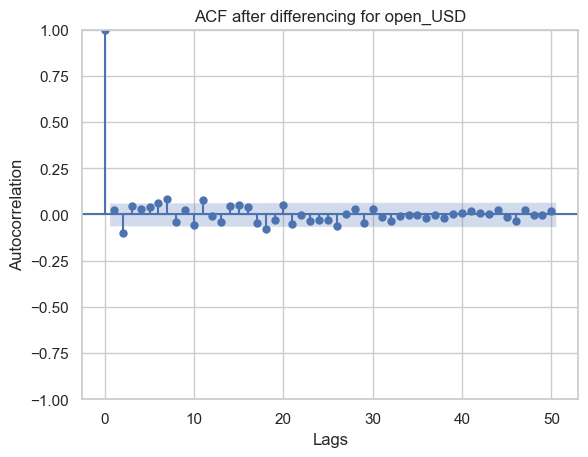

<Figure size 800x400 with 0 Axes>

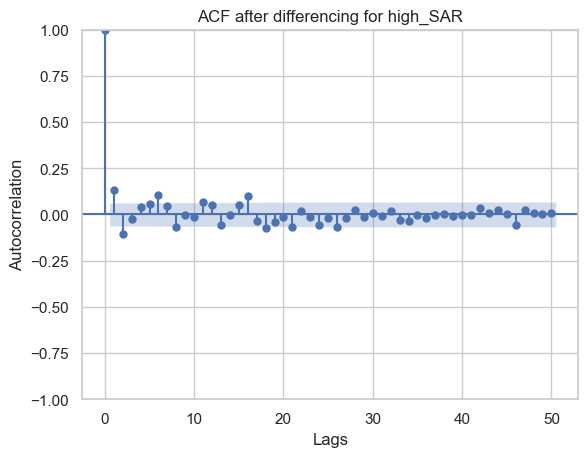

<Figure size 800x400 with 0 Axes>

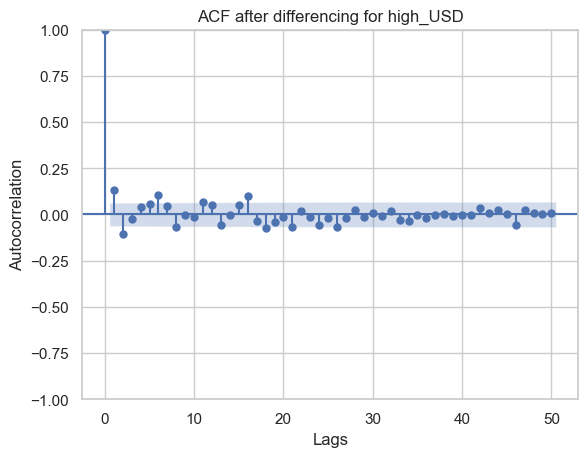

<Figure size 800x400 with 0 Axes>

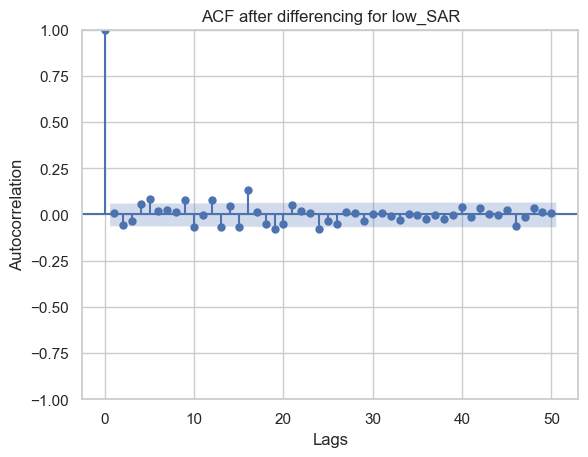

<Figure size 800x400 with 0 Axes>

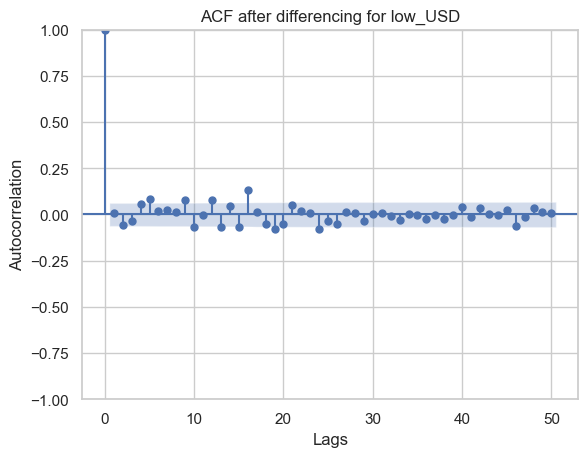

<Figure size 800x400 with 0 Axes>

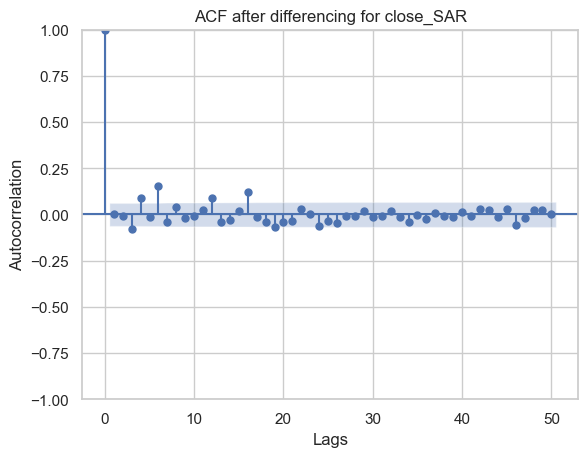

<Figure size 800x400 with 0 Axes>

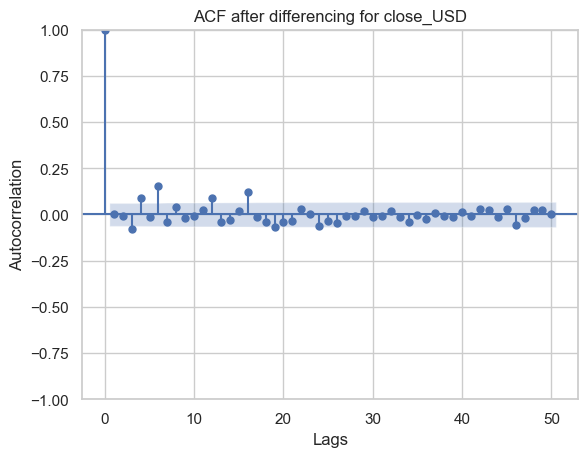

<Figure size 800x400 with 0 Axes>

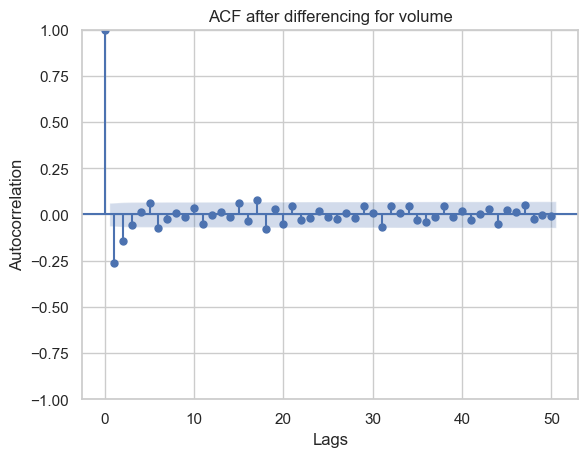

<Figure size 800x400 with 0 Axes>

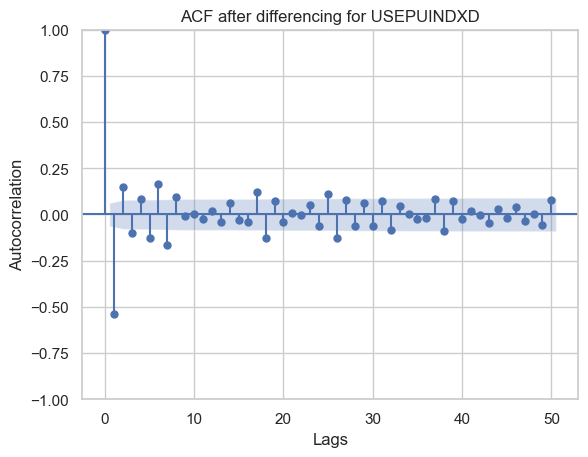

In [23]:
# Select only the numerical columns
numerical_columns = merged_df.select_dtypes(include='number').columns.tolist()

# Apply differencing to each numerical column and plot ACF after differencing
for column in numerical_columns:
    differenced_data = merged_df[column].diff().dropna()
    
    plt.figure(figsize=(8, 4))
    plot_acf(differenced_data, lags=50)
    plt.title(f'ACF after differencing for {column}')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.show()

<Figure size 800x400 with 0 Axes>

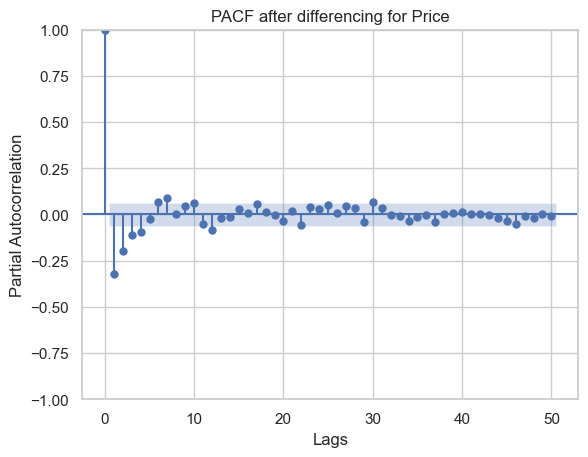

<Figure size 800x400 with 0 Axes>

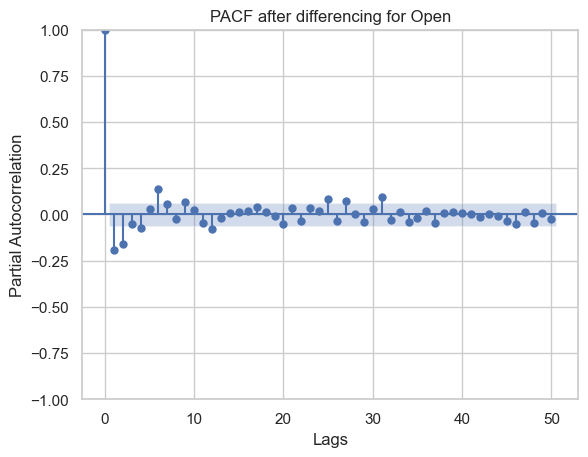

<Figure size 800x400 with 0 Axes>

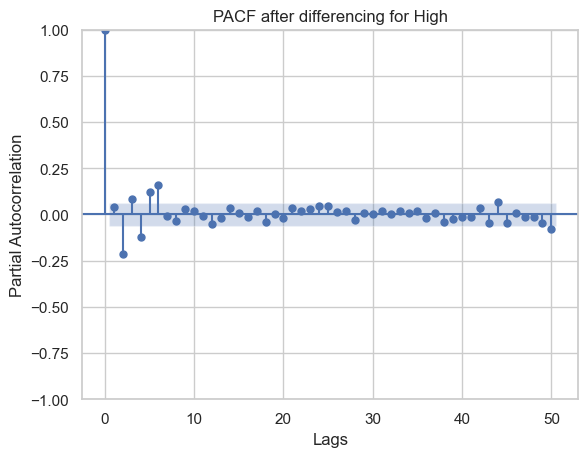

<Figure size 800x400 with 0 Axes>

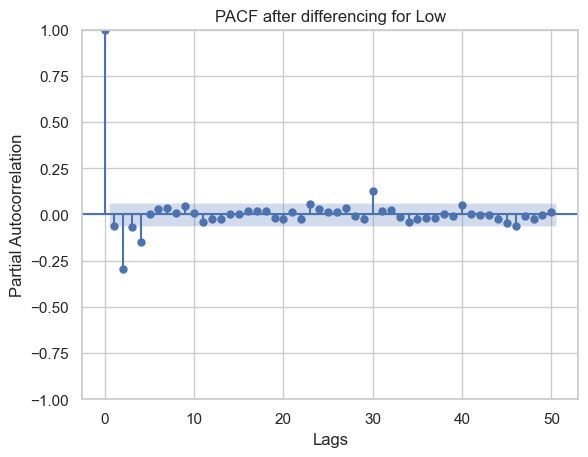

<Figure size 800x400 with 0 Axes>

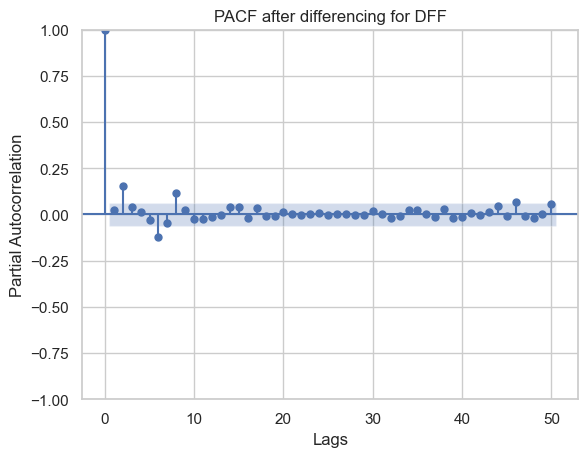

<Figure size 800x400 with 0 Axes>

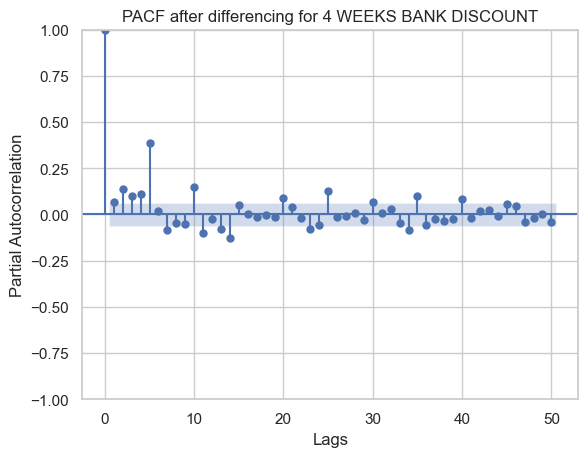

<Figure size 800x400 with 0 Axes>

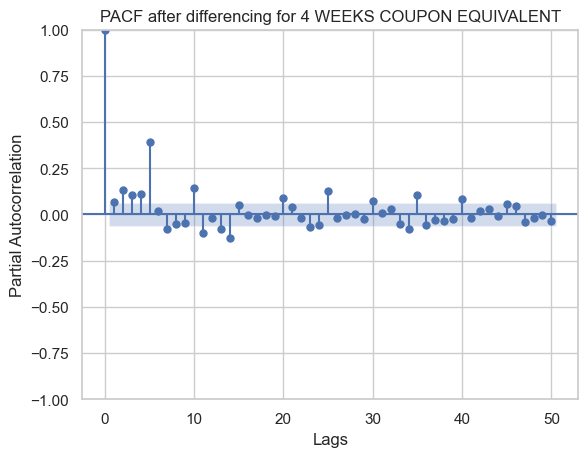

<Figure size 800x400 with 0 Axes>

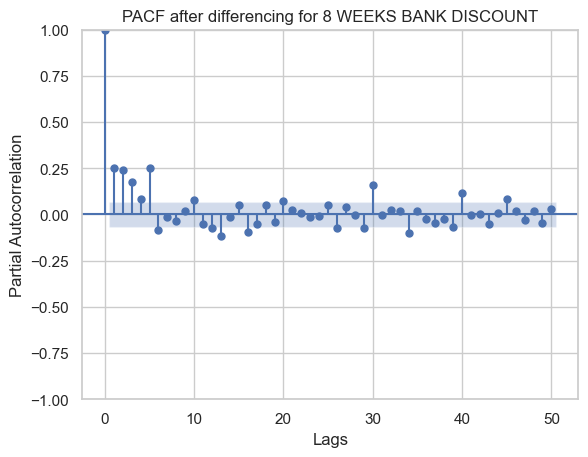

<Figure size 800x400 with 0 Axes>

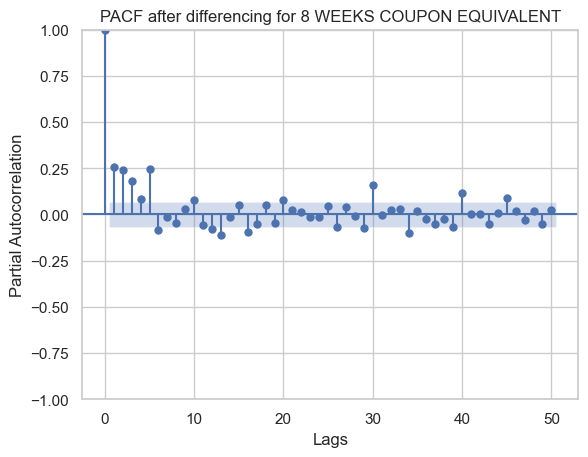

<Figure size 800x400 with 0 Axes>

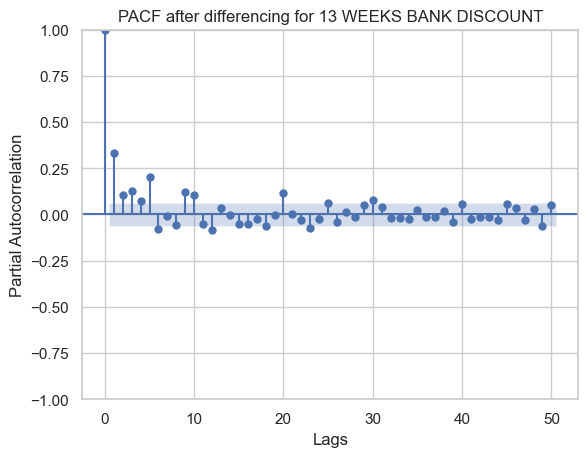

<Figure size 800x400 with 0 Axes>

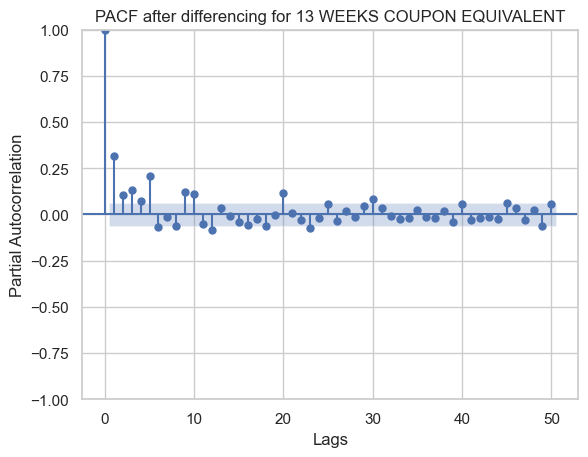

<Figure size 800x400 with 0 Axes>

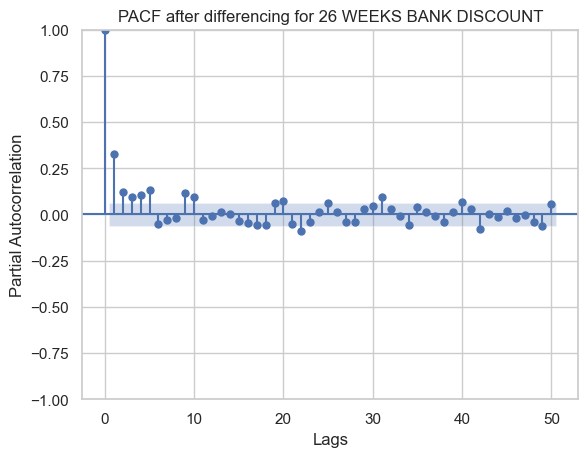

<Figure size 800x400 with 0 Axes>

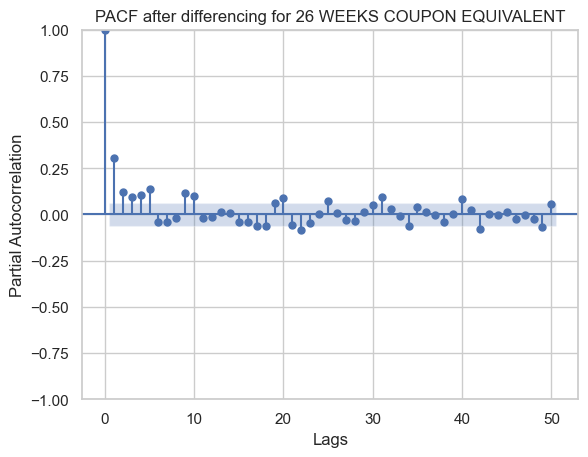

<Figure size 800x400 with 0 Axes>

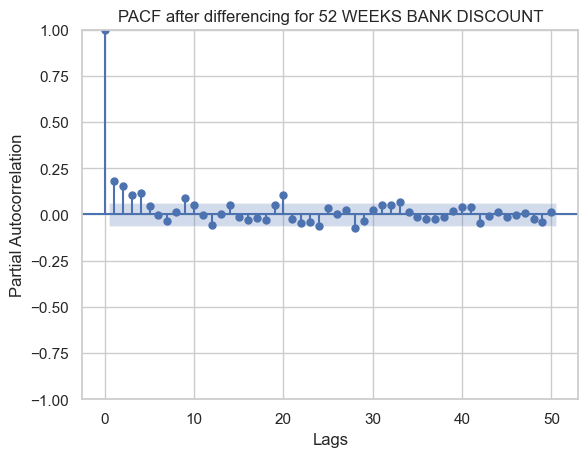

<Figure size 800x400 with 0 Axes>

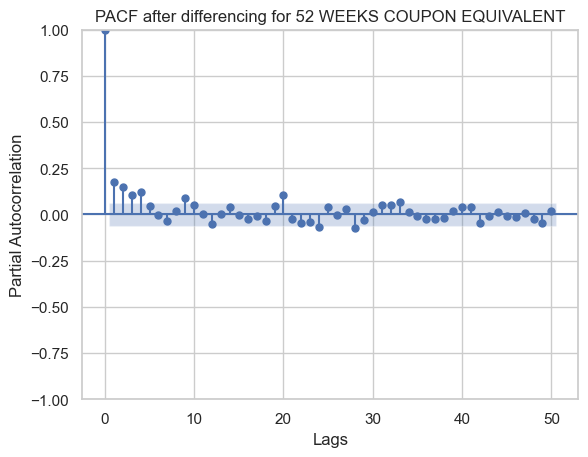

<Figure size 800x400 with 0 Axes>

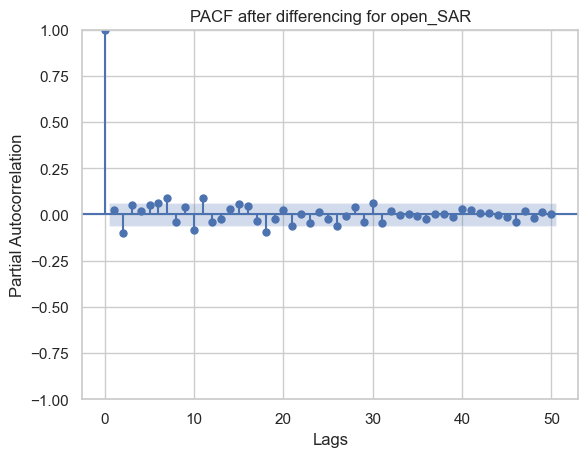

<Figure size 800x400 with 0 Axes>

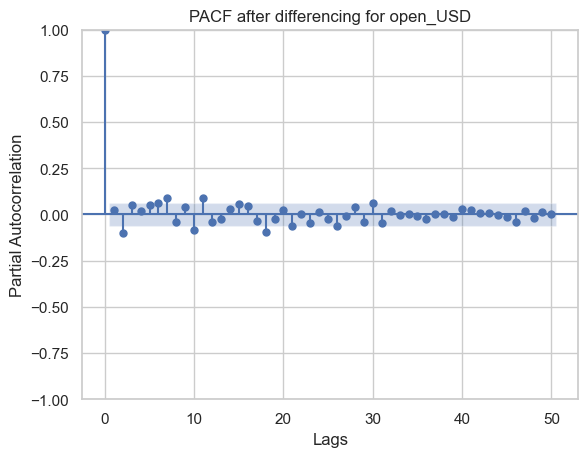

<Figure size 800x400 with 0 Axes>

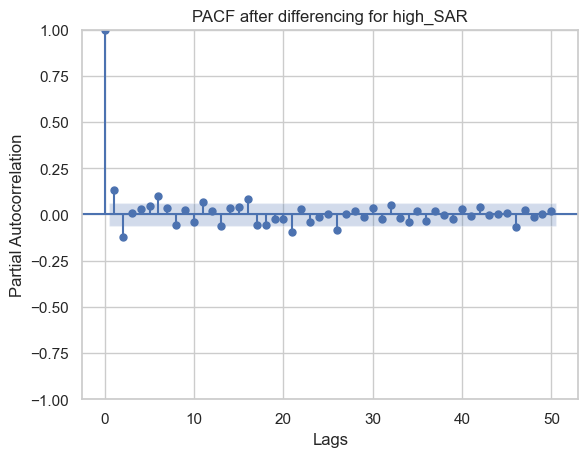

<Figure size 800x400 with 0 Axes>

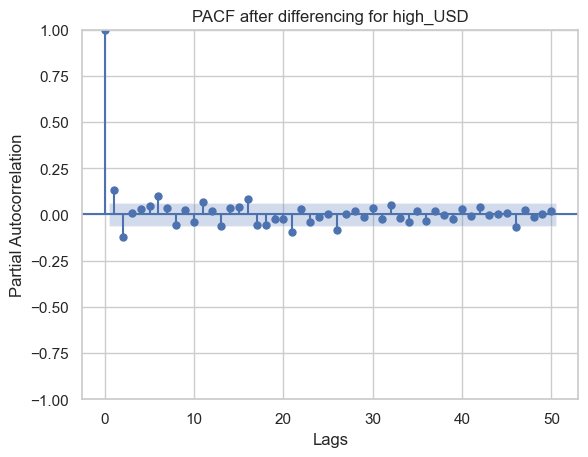

<Figure size 800x400 with 0 Axes>

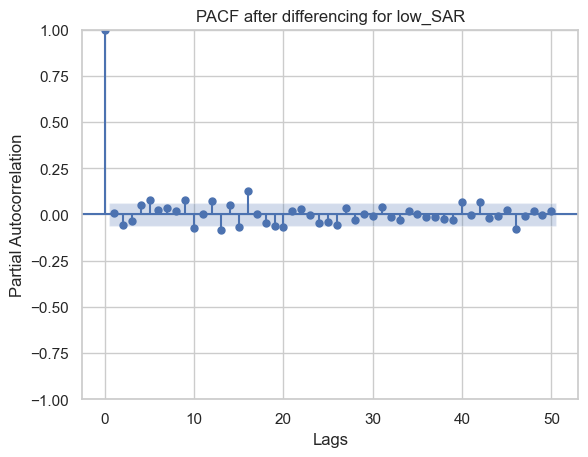

<Figure size 800x400 with 0 Axes>

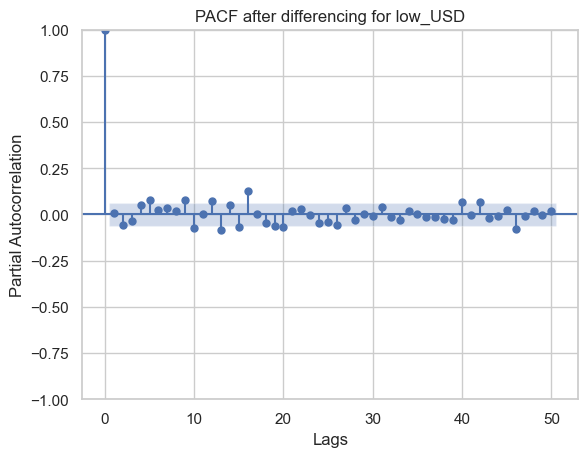

<Figure size 800x400 with 0 Axes>

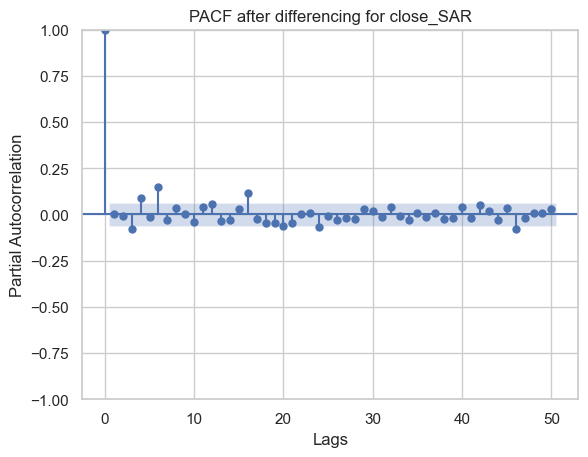

<Figure size 800x400 with 0 Axes>

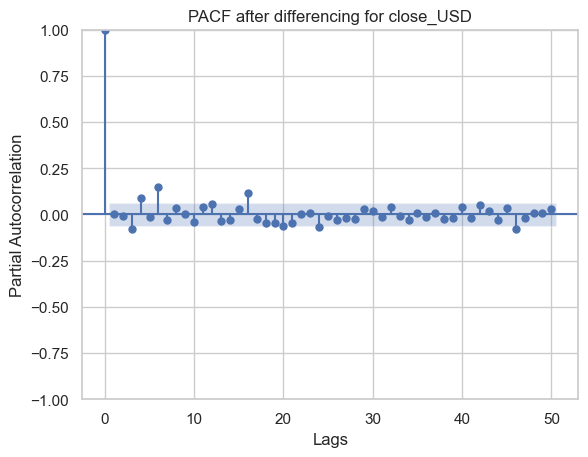

<Figure size 800x400 with 0 Axes>

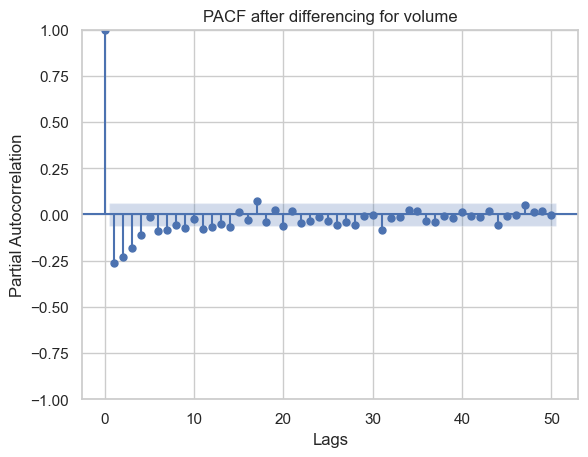

<Figure size 800x400 with 0 Axes>

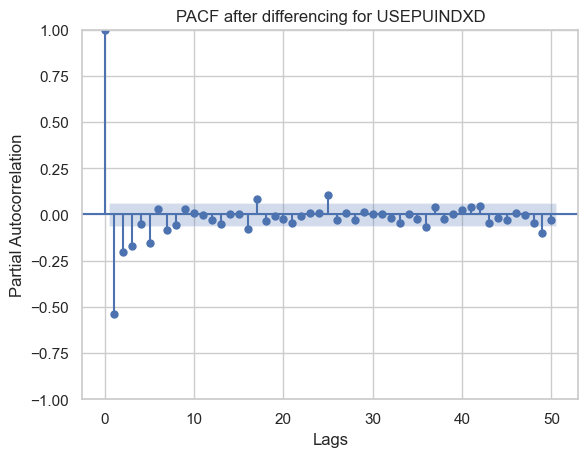

In [24]:
# Select only the numerical columns
numerical_columns = merged_df.select_dtypes(include='number').columns.tolist()

# Apply differencing to each numerical column and plot PACF after differencing
for column in numerical_columns:
    differenced_data = merged_df[column].diff().dropna()
    
    plt.figure(figsize=(8, 4))
    plot_pacf(differenced_data, lags=50)
    plt.title(f'PACF after differencing for {column}')
    plt.xlabel('Lags')
    plt.ylabel('Partial Autocorrelation')
    plt.show()

### Regression plots for close_SAR

<Figure size 800x500 with 0 Axes>

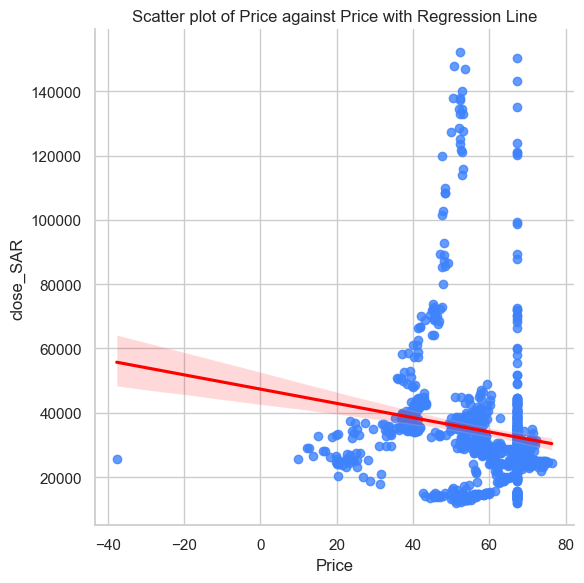

<Figure size 800x500 with 0 Axes>

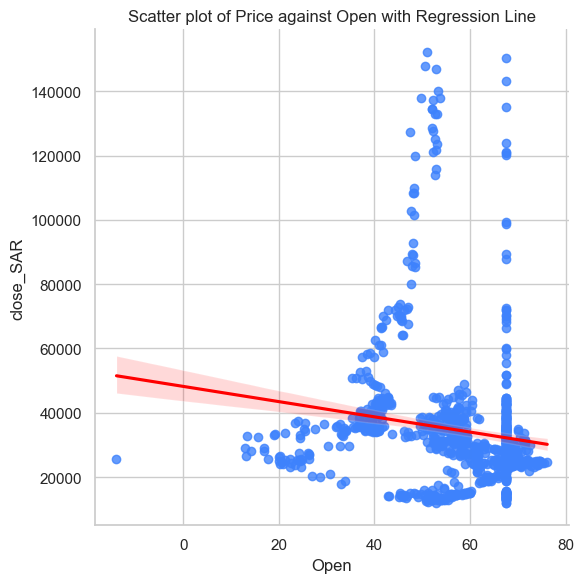

<Figure size 800x500 with 0 Axes>

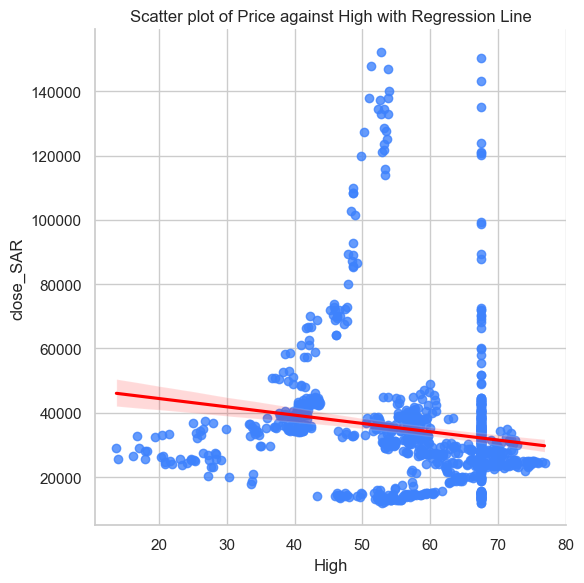

<Figure size 800x500 with 0 Axes>

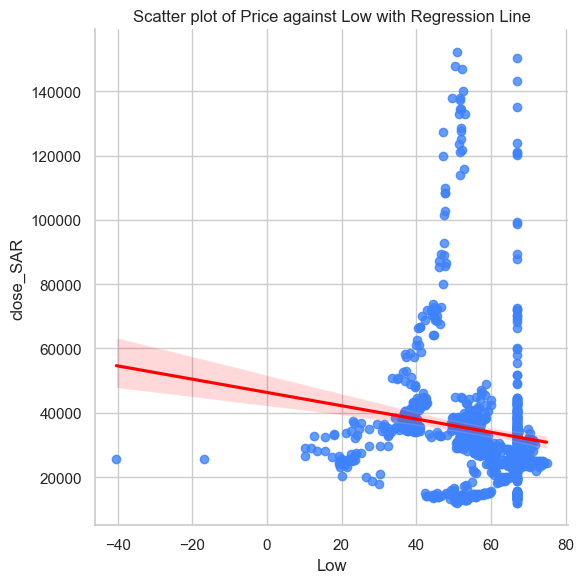

<Figure size 800x500 with 0 Axes>

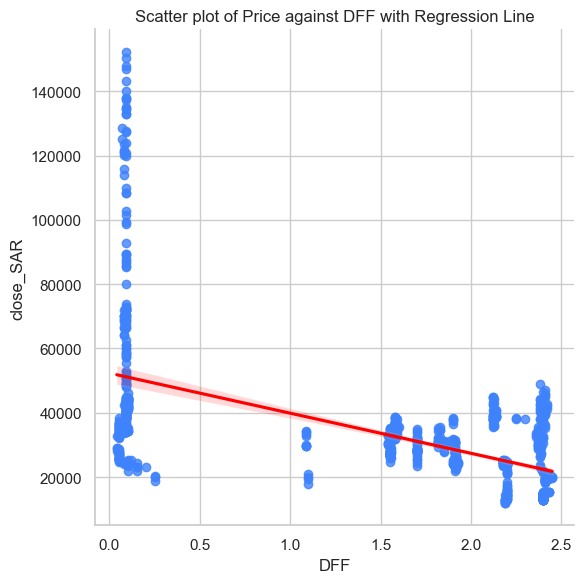

<Figure size 800x500 with 0 Axes>

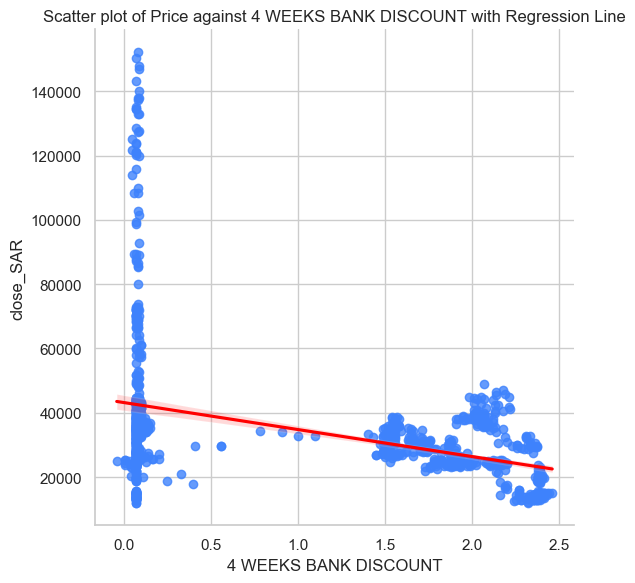

<Figure size 800x500 with 0 Axes>

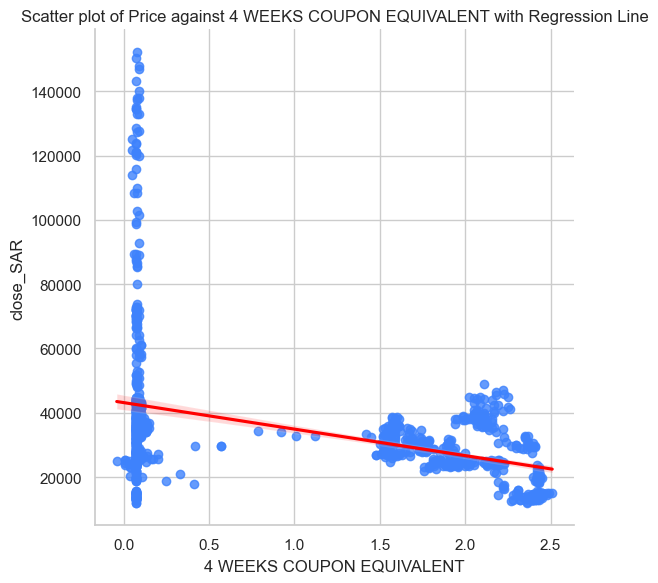

<Figure size 800x500 with 0 Axes>

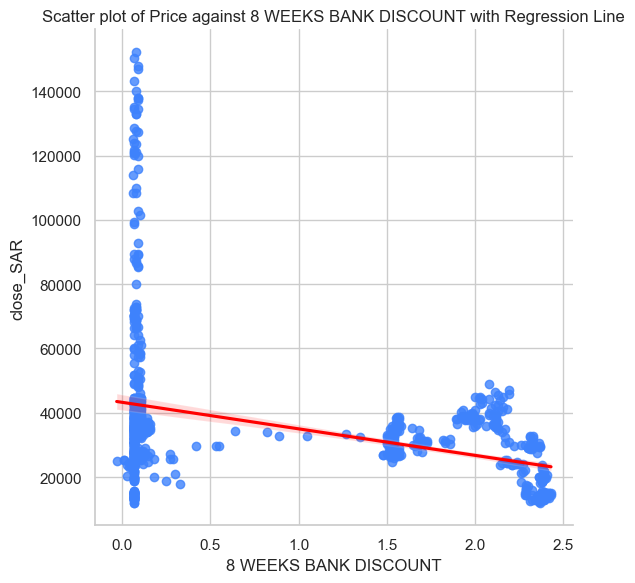

<Figure size 800x500 with 0 Axes>

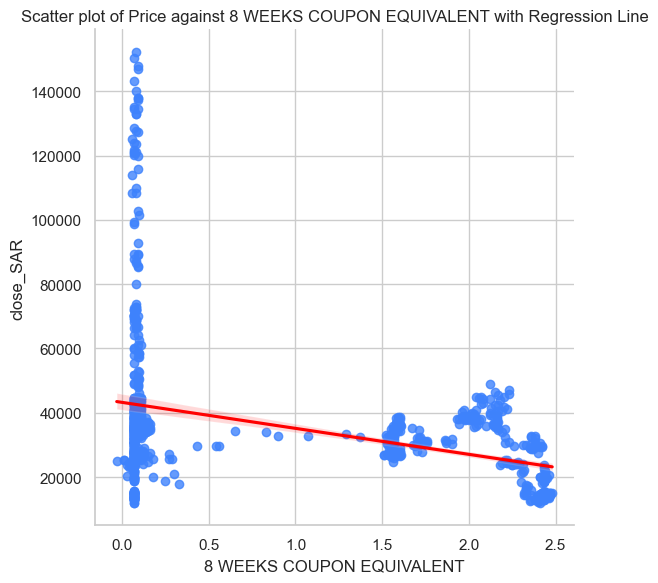

<Figure size 800x500 with 0 Axes>

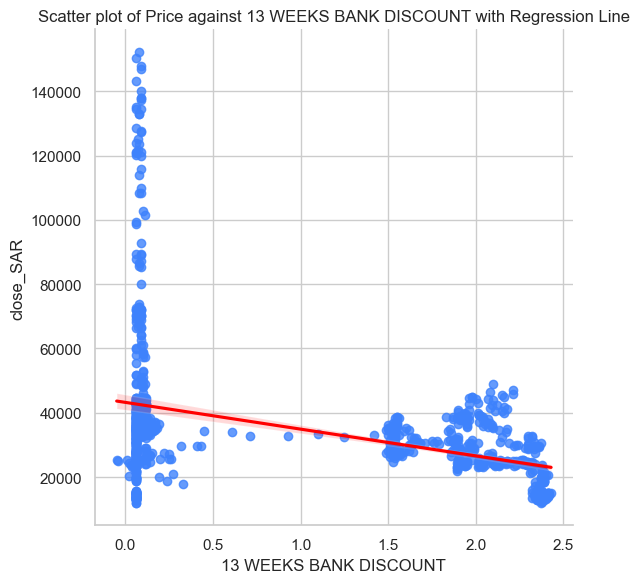

<Figure size 800x500 with 0 Axes>

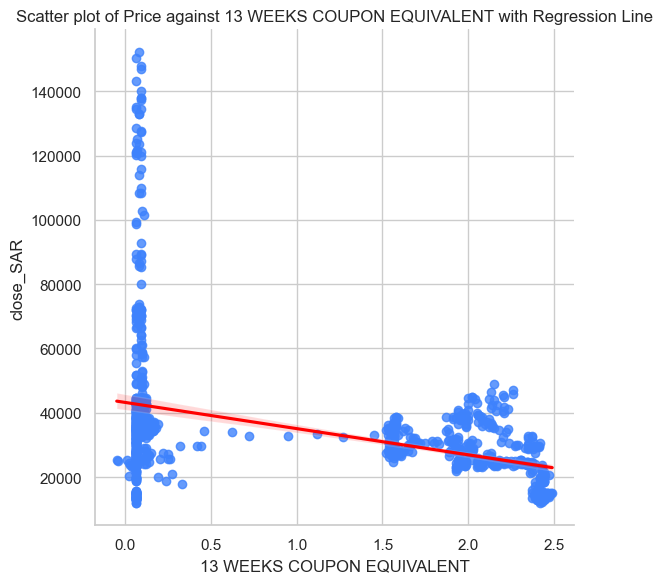

<Figure size 800x500 with 0 Axes>

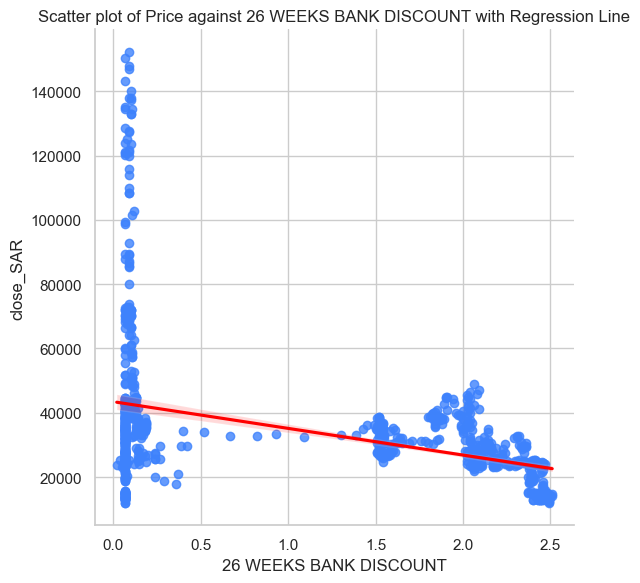

<Figure size 800x500 with 0 Axes>

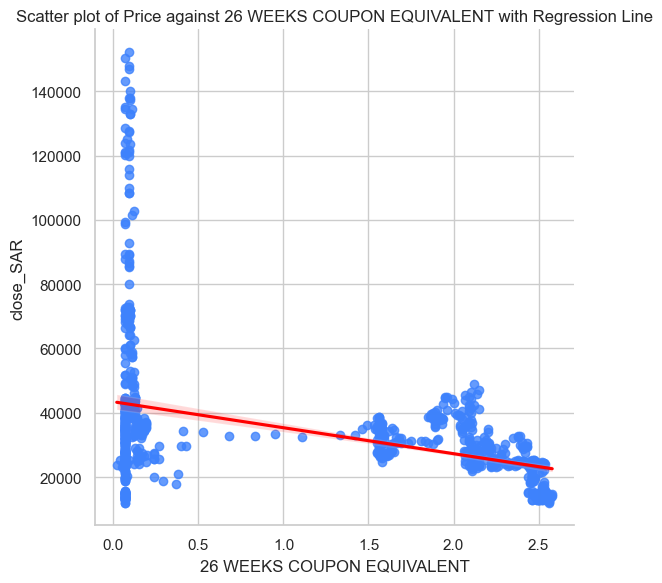

<Figure size 800x500 with 0 Axes>

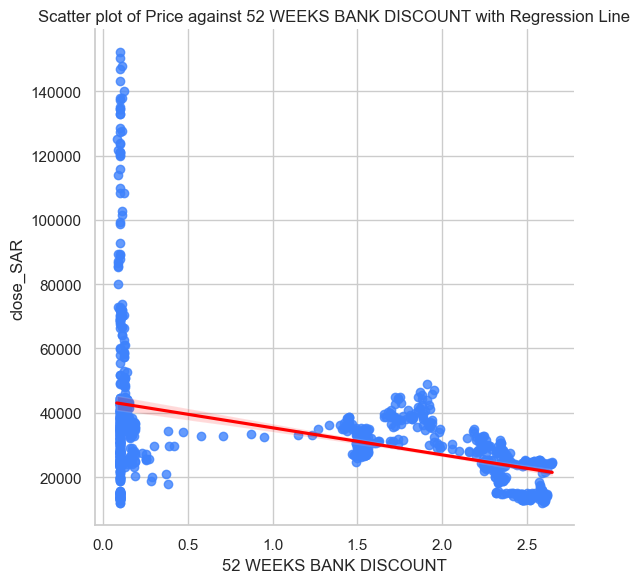

<Figure size 800x500 with 0 Axes>

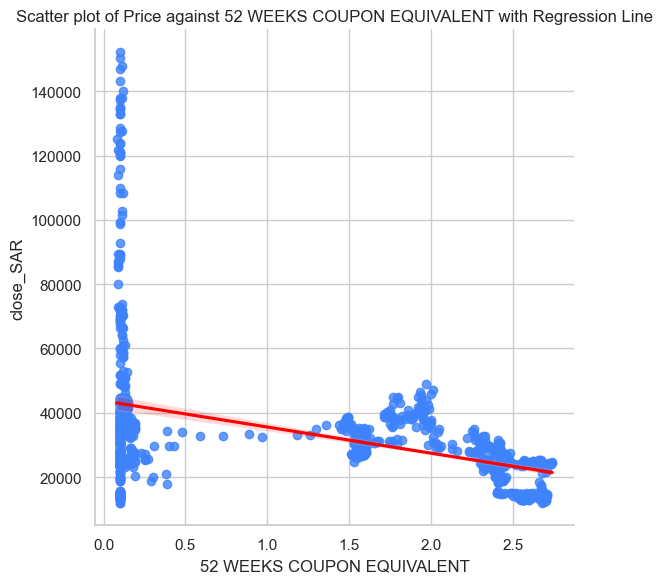

<Figure size 800x500 with 0 Axes>

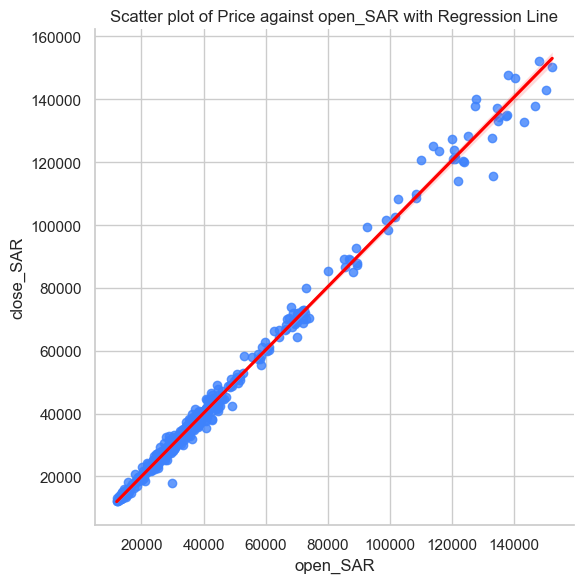

<Figure size 800x500 with 0 Axes>

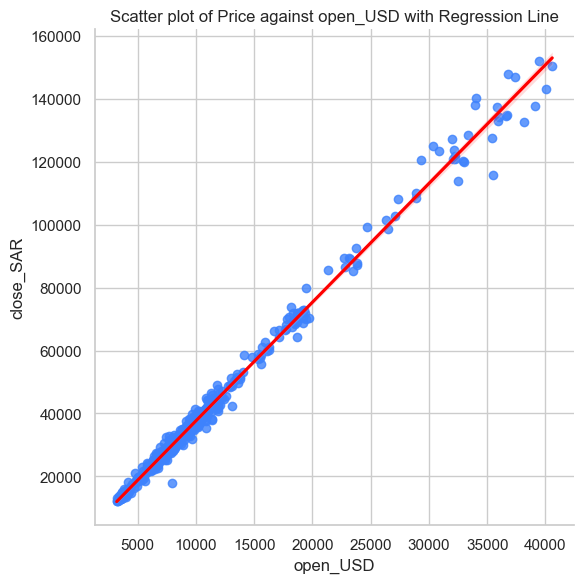

<Figure size 800x500 with 0 Axes>

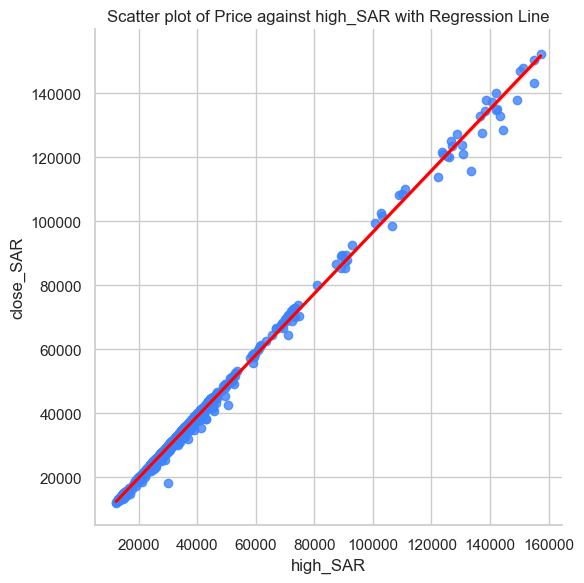

<Figure size 800x500 with 0 Axes>

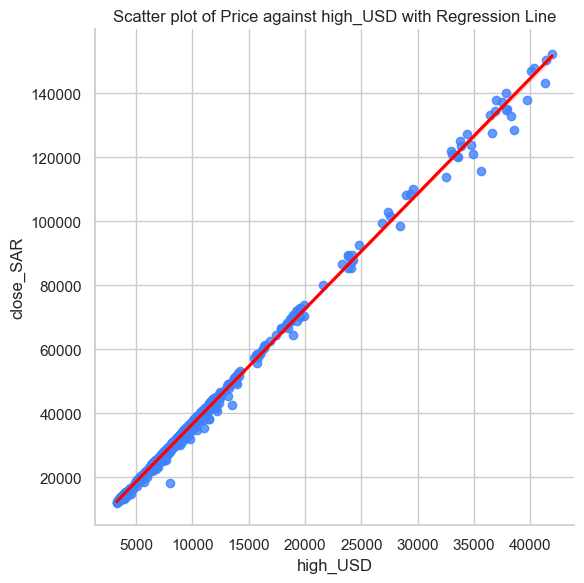

<Figure size 800x500 with 0 Axes>

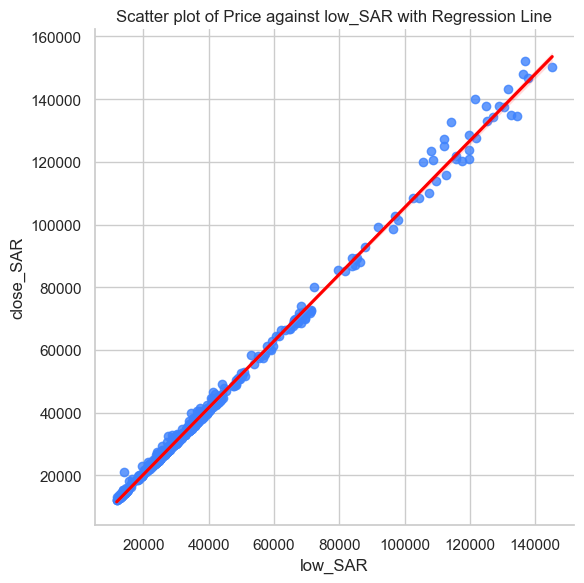

<Figure size 800x500 with 0 Axes>

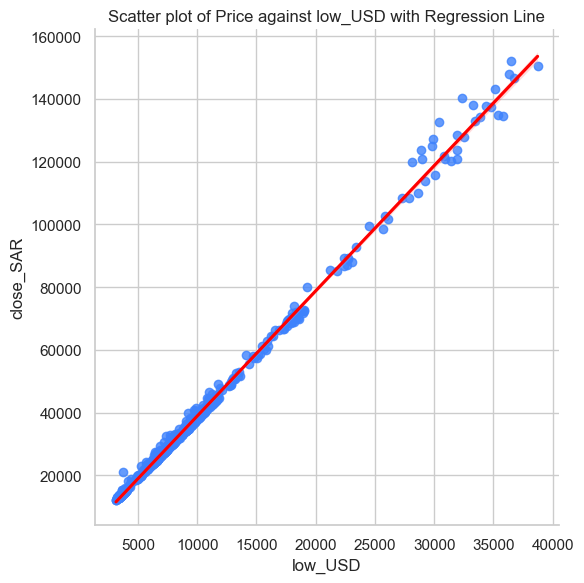

<Figure size 800x500 with 0 Axes>

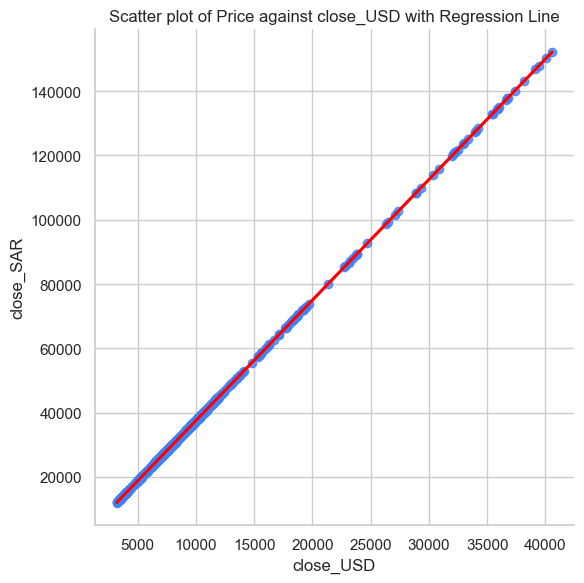

<Figure size 800x500 with 0 Axes>

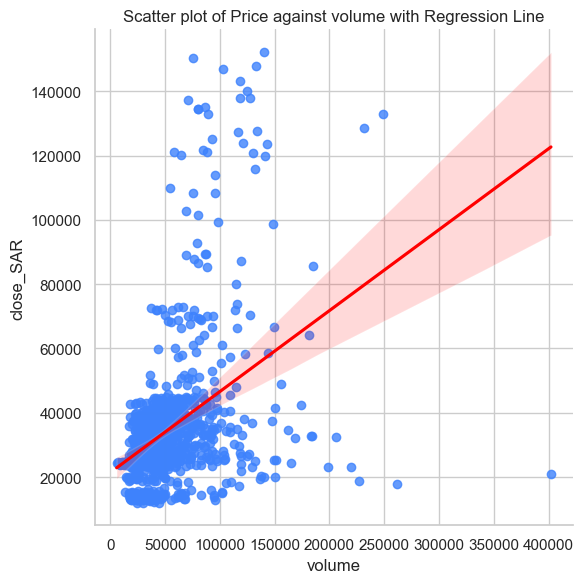

<Figure size 800x500 with 0 Axes>

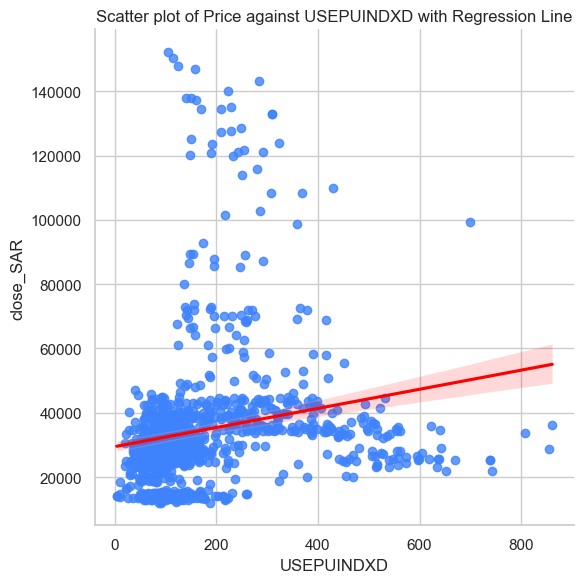

In [34]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Set the style of the plots
sns.set(style="whitegrid")

# Plotting scatter plots of 'Price' against all other numerical columns with a regression line
for column in numerical_columns:
    if column != 'close_SAR':
        plt.figure(figsize=(8, 5))
        sns.lmplot(x=column, y='close_SAR', data=merged_df, height=6, scatter_kws={'color': '#3e82fc'}, line_kws={'color': 'red'})
        plt.xlabel(column)
        plt.ylabel('close_SAR')
        plt.title(f'Scatter plot of Price against {column} with Regression Line')
        plt.tight_layout()
        plt.show()

# Reset warnings to default
warnings.resetwarnings()


### Regression plots for close_USD  

<Figure size 800x500 with 0 Axes>

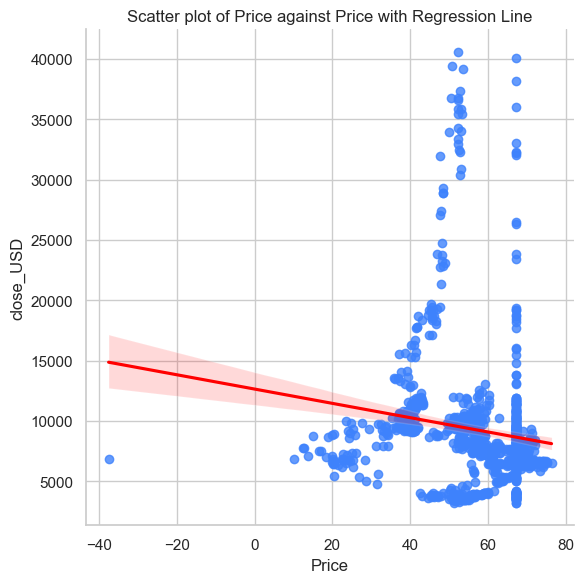

<Figure size 800x500 with 0 Axes>

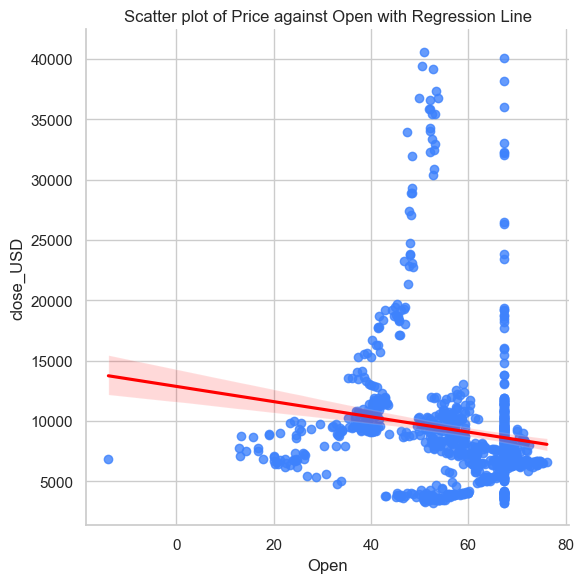

<Figure size 800x500 with 0 Axes>

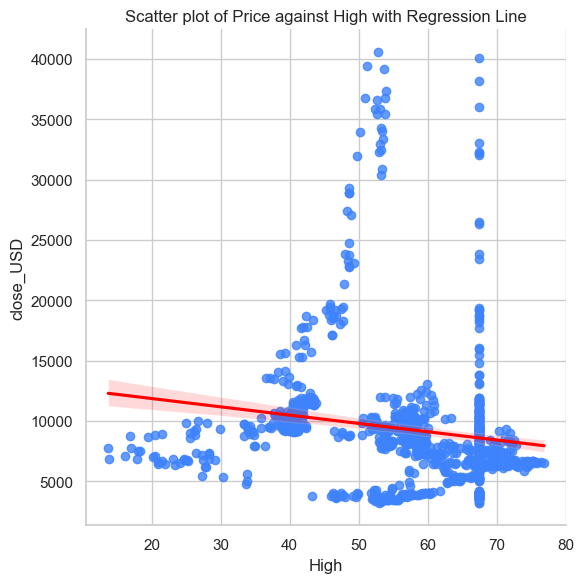

<Figure size 800x500 with 0 Axes>

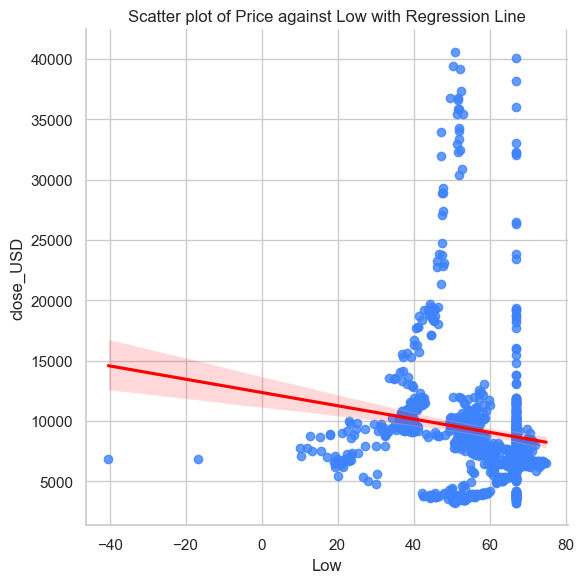

<Figure size 800x500 with 0 Axes>

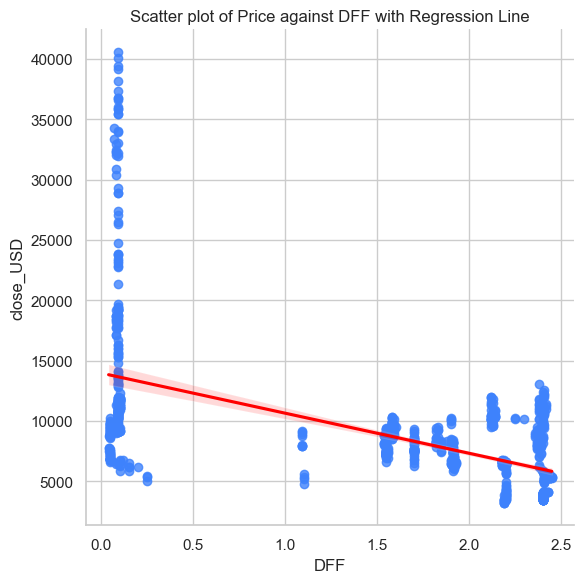

<Figure size 800x500 with 0 Axes>

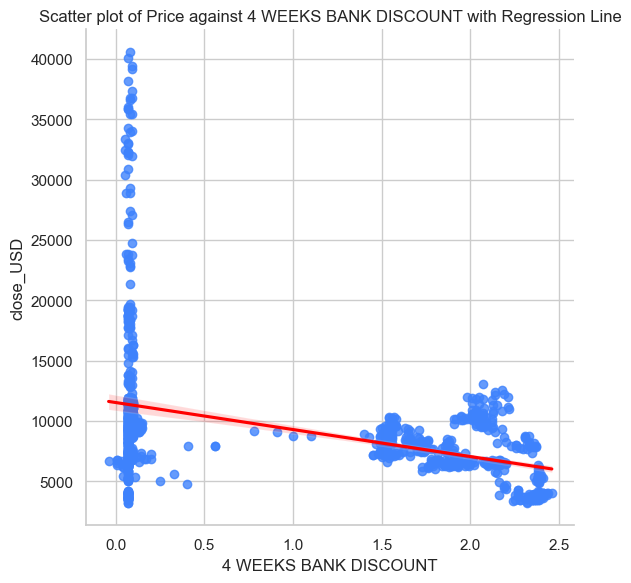

<Figure size 800x500 with 0 Axes>

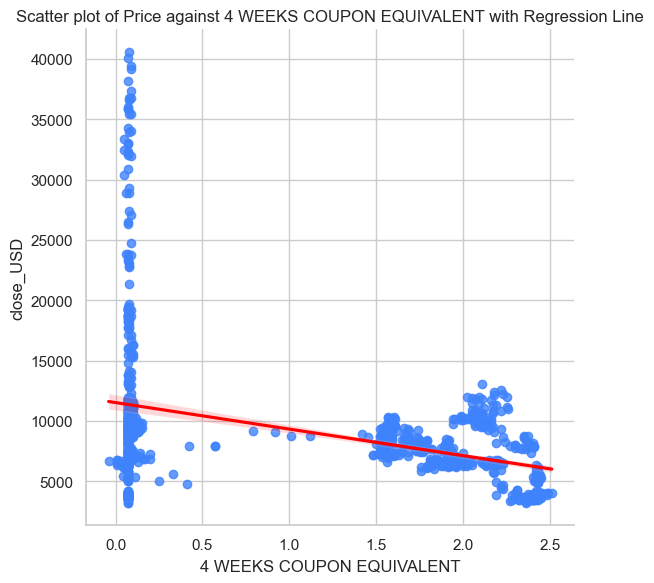

<Figure size 800x500 with 0 Axes>

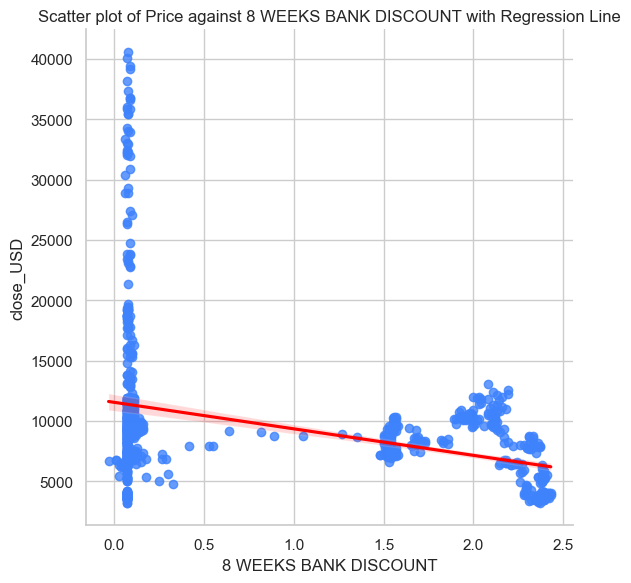

<Figure size 800x500 with 0 Axes>

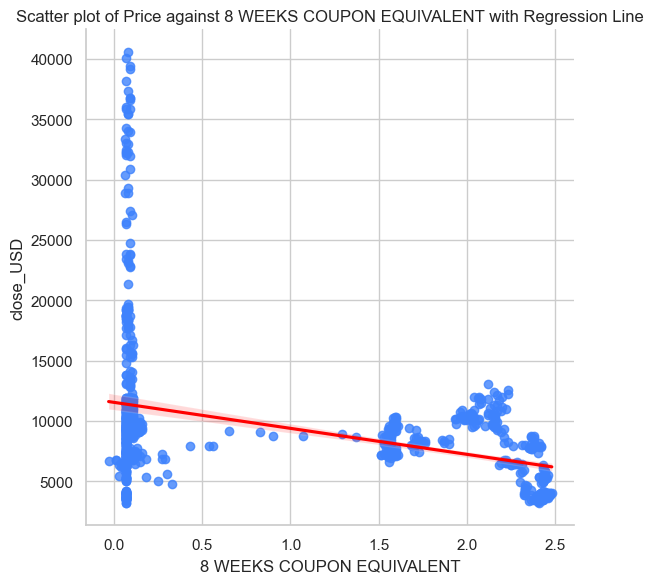

<Figure size 800x500 with 0 Axes>

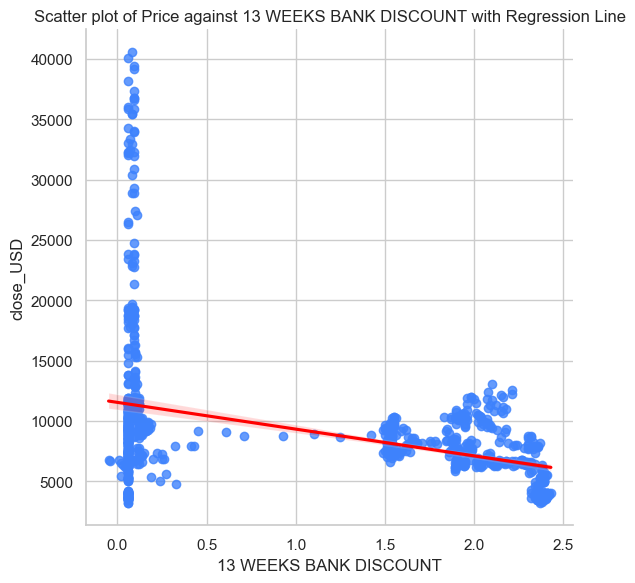

<Figure size 800x500 with 0 Axes>

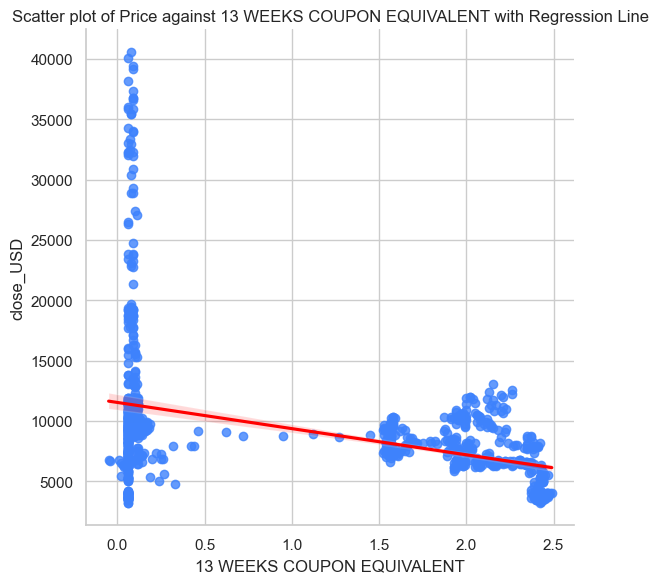

<Figure size 800x500 with 0 Axes>

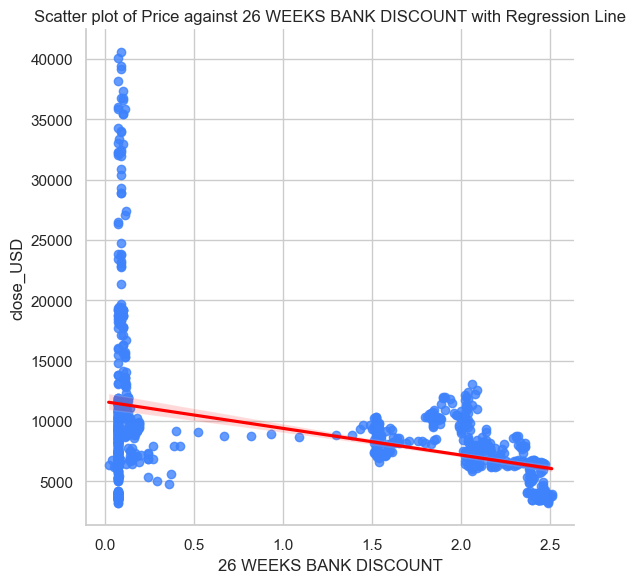

<Figure size 800x500 with 0 Axes>

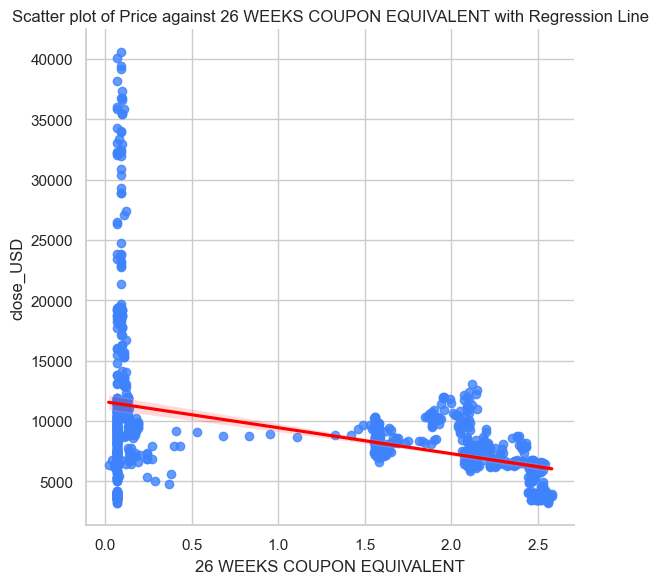

<Figure size 800x500 with 0 Axes>

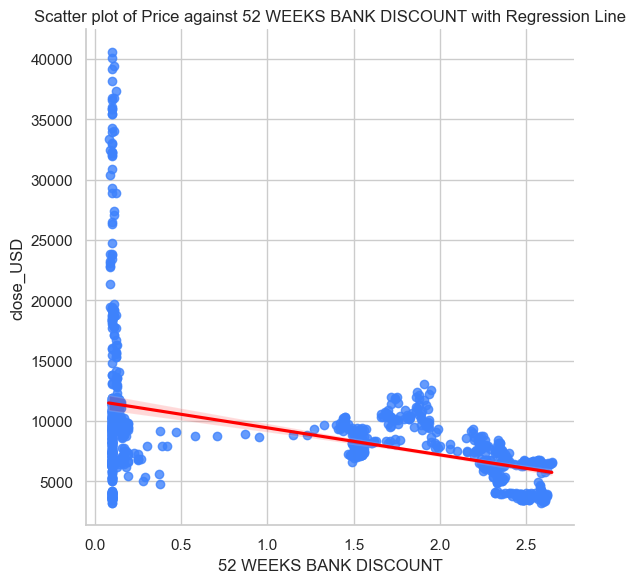

<Figure size 800x500 with 0 Axes>

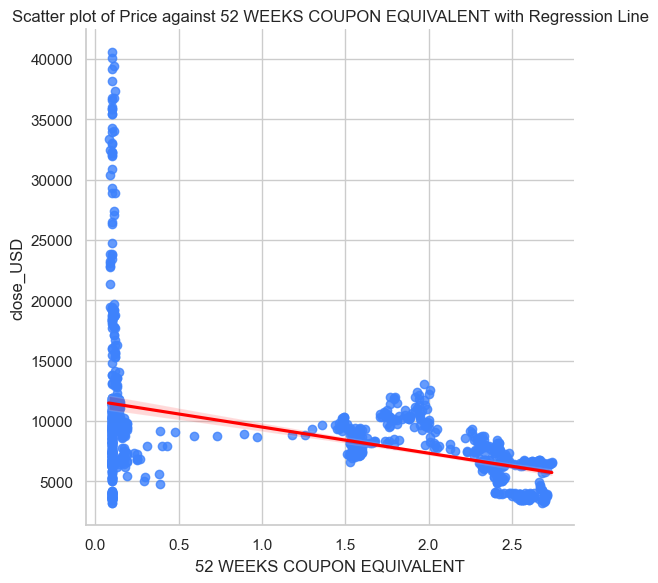

<Figure size 800x500 with 0 Axes>

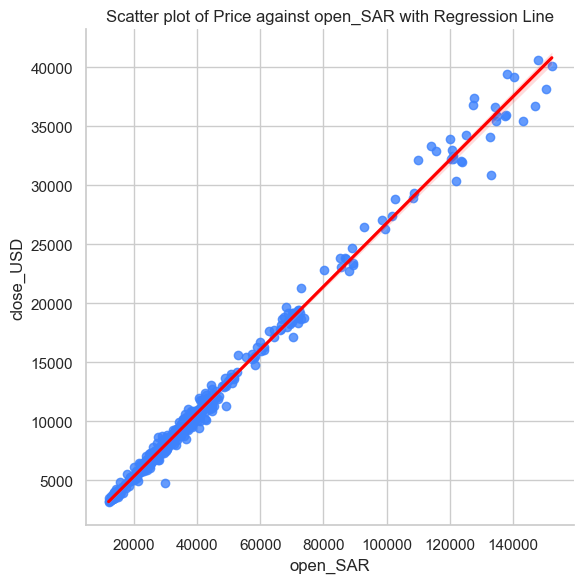

<Figure size 800x500 with 0 Axes>

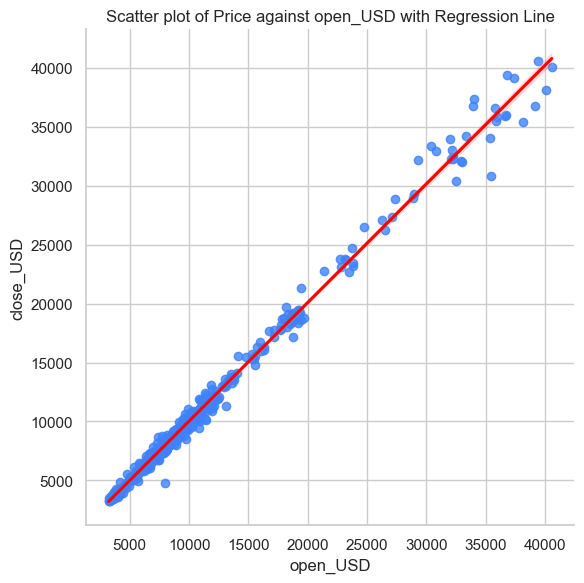

<Figure size 800x500 with 0 Axes>

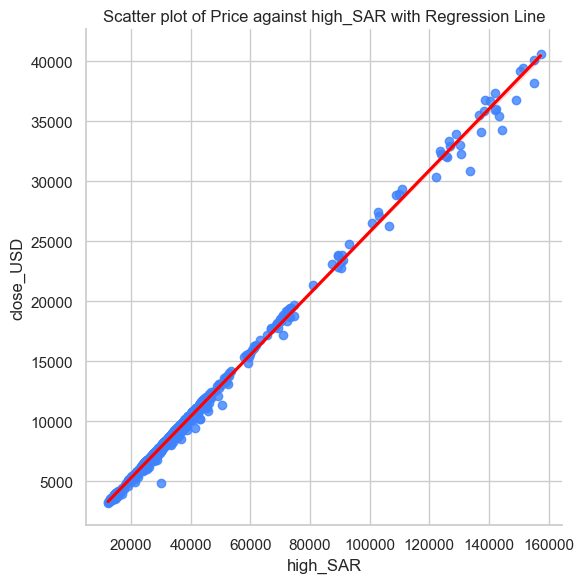

<Figure size 800x500 with 0 Axes>

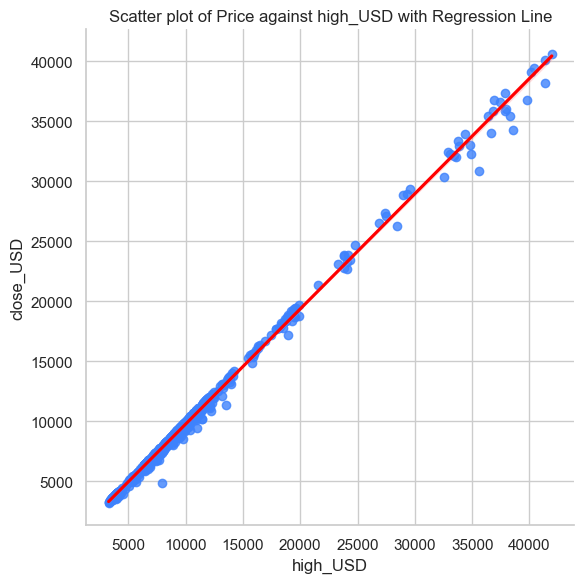

<Figure size 800x500 with 0 Axes>

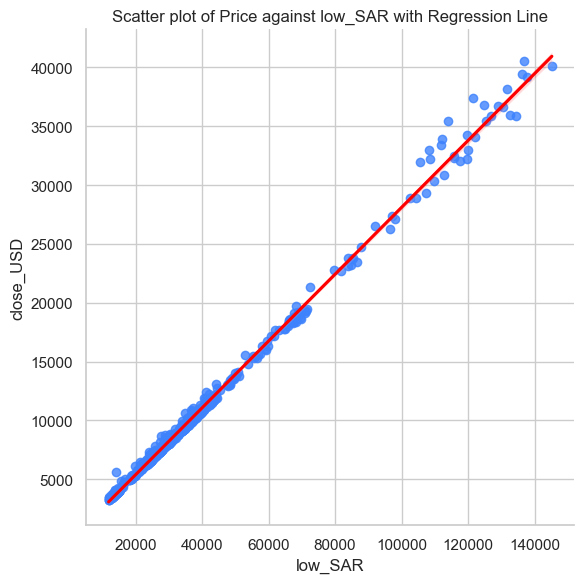

<Figure size 800x500 with 0 Axes>

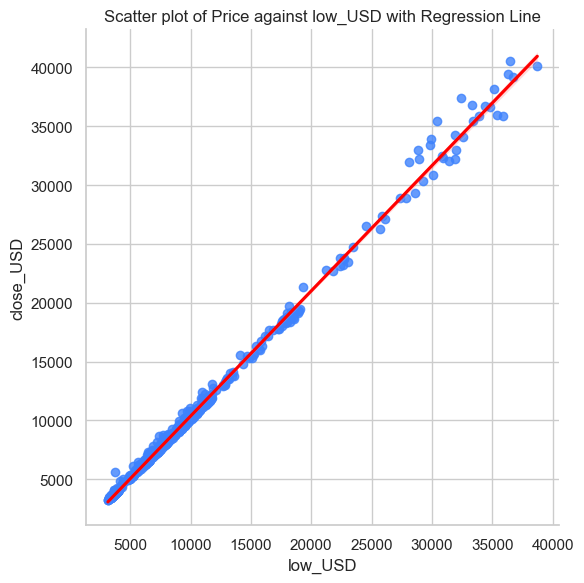

<Figure size 800x500 with 0 Axes>

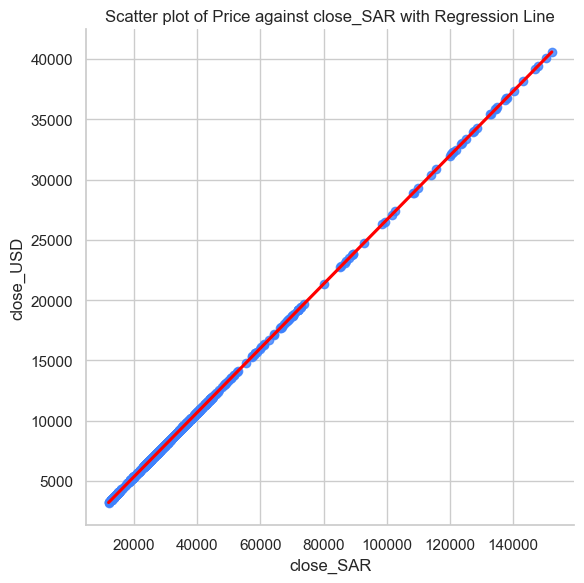

<Figure size 800x500 with 0 Axes>

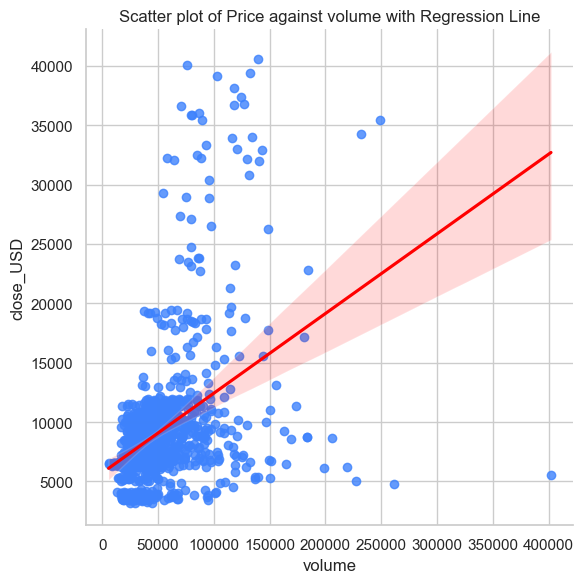

<Figure size 800x500 with 0 Axes>

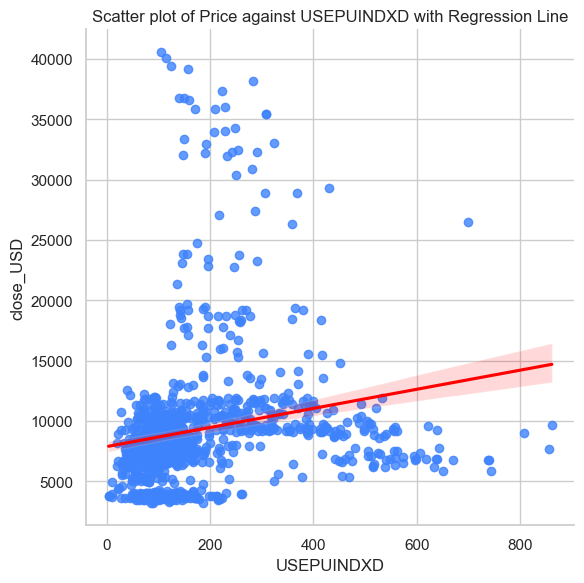

In [35]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Set the style of the plots
sns.set(style="whitegrid")

# Plotting scatter plots of 'Price' against all other numerical columns with a regression line
for column in numerical_columns:
    if column != 'close_USD':
        plt.figure(figsize=(8, 5))
        sns.lmplot(x=column, y='close_USD', data=merged_df, height=6, scatter_kws={'color': '#3e82fc'}, line_kws={'color': 'red'})
        plt.xlabel(column)
        plt.ylabel('close_USD')
        plt.title(f'Scatter plot of Price against {column} with Regression Line')
        plt.tight_layout()
        plt.show()

# Reset warnings to default
warnings.resetwarnings()
